<a href="https://colab.research.google.com/github/SatyaHarshithaDanda/Youtube_Video_Analysis/blob/main/Youtube_Video_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Youtube Video Analysis**


###**ACTIVITIES**
##Initial Data Cleaning

1) Using json file to add the category column to the data replacing the category Id column

2) Check the data types of all the variable if they are appropriate for analysis

3) Converting the two columns publishedAt and trending_date to datetime

4) Check and take care of missing values. If column like "description" have missing values we can replace it by "No Description Provided"


## Framing Questions for Analysis
1.  Group by Channel Title and find top channels with Views, Likes, Dislikes and Comments

2.  Group by Channel Category and find top channels with Views, Likes, Dislikes and Comments and bottom channels as well

3. Which Category Videos are being watched and are in trending for most of the times? (Categories such as: Movies, Education,Videoblogging, etc)

4. What's the average time taken for a video to be in trending categorically?

5. What's the average no.of views required to enter into trending?

6. Which Youtube channel in India has more videos in Trending?

7. Understanding the significance of Likes,Dislikes and Comments.

###FURTHER ANALYSIS

1) Which category of videos have comments disabled ?

2) Which category of videos have ratings disabled ?

3) Most watched video in India overall | Year wise | Category wise

4) Yearwise number of Videos published which were trending

5) Distributions of Numerical Columns

6) View the correlations between the numerical variables

7) Plot the lmplots and regplots with numerical and categorical variables combinations and their relationships

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import scale
import plotly.express as px
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [4]:
categories = pd.read_json("IN_category_id.json")

In [5]:
categories

,kind,etag,items
0,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."
2,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'HCj..."
3,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'ra8..."
4,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '7mq..."
5,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '0Z6..."
6,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'K_-..."
7,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'I3I..."
8,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'D1W..."
9,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'QME..."


In [6]:
categories['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '5XGylIs7zkjHh5940dsT5862m1Y',
 'id': '2',
 'snippet': {'title': 'Autos & Vehicles',
  'assignable': True,
  'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}}

In [7]:
#Creating dictionary for json file provided for category and category id
category_dict = {}
for i in categories['items']:
    category_dict[i['id']] = i['snippet']['title']

In [8]:
category_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [9]:
#Reading the actual data
df = pd.read_csv("IN_youtube_trending_data.csv")


In [10]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


In [11]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,152593.000000,1.525930e+05,1.525930e+05,1.525930e+05,1.525930e+05
mean,20.928005,3.148897e+06,1.695163e+05,3.842192e+03,9.988589e+03
std,5.958950,7.553347e+06,4.454034e+05,9.236131e+04,8.708685e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,4.568570e+05,1.737800e+04,0.000000e+00,4.080000e+02
50%,24.000000,1.100973e+06,5.066700e+04,3.830000e+02,1.330000e+03
75%,24.000000,2.801690e+06,1.464980e+05,1.931000e+03,4.613000e+03
max,29.000000,2.644074e+08,1.611524e+07,1.234147e+07,6.738565e+06


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152593 entries, 0 to 152592
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           152593 non-null  object
 1   title              152593 non-null  object
 2   publishedAt        152593 non-null  object
 3   channelId          152593 non-null  object
 4   channelTitle       152592 non-null  object
 5   categoryId         152593 non-null  int64 
 6   trending_date      152593 non-null  object
 7   tags               152593 non-null  object
 8   view_count         152593 non-null  int64 
 9   likes              152593 non-null  int64 
 10  dislikes           152593 non-null  int64 
 11  comment_count      152593 non-null  int64 
 12  thumbnail_link     152593 non-null  object
 13  comments_disabled  152593 non-null  bool  
 14  ratings_disabled   152593 non-null  bool  
 15  description        135820 non-null  object
dtypes: bool(2), int64(5)

<br>

Let's check the no.of records for a random video: Iot0eF6EoNA

In [13]:
df.head()



,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


In [14]:
df[df.video_id=="Iot0eF6EoNA"]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
171,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-13T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,28165455,412594,7576610,659733,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
348,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-14T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,39577543,509684,9260973,818229,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
523,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-15T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,48458719,569806,10479328,926675,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
697,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-16T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,53865934,605119,11213118,981278,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
894,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-17T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,57978838,629440,11318674,1015427,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1099,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-18T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,60684140,645367,11610617,1033525,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1313,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-19T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,62560202,657374,11828671,1043781,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1548,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-20T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,64126227,667503,12066691,1057203,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1809,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-21T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,65454611,675091,12237370,1070532,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...


Details inferred:

1. Same video can be there multiple times in dataset as the video can stay in trending for many consecutive days.
2. View Count,Likes and Dislikes Change as the time prolongs. So we shouldn't do group by on a Video_Id and add all the view_Counts,Likes,Dislikes as those will be repeated.

In [15]:
df.video_id.nunique()

46294

Though there are 152593: entries, no.of unique videos are: 46294

In [16]:
df.channelTitle.nunique()

4009

In [17]:
df.drop(["channelId","thumbnail_link"], inplace=True, axis=1)

<br>


For further Analysis, Let's gather enough details

df_maxViews stores the last occurance of VideoID.

Intuition: Gathering final views,likes,comments before relegating from Trending data.

In [18]:
df_maxViews = df.sort_values('view_count', ascending=False).drop_duplicates(['video_id'])
df_maxViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
78854,SQlTbuXL-6M,Malupu female Version 4k | Deepthi Sunaina | S...,2021-09-25T08:29:12Z,Deepthi Sunaina,24,2021-10-01T00:00:00Z,Deepthi Sunaina Official|Dance covers|Telugu D...,2441652,168394,2884,3555,False,False,"A tale of two hearts, broken yet united, weepi..."
21577,O__Lo2FQJKo,No More CLASHMAS?!,2020-12-03T05:59:07Z,Clash of Clans,20,2020-12-05T00:00:00Z,clash of clans|COC|Clash of Clans Gameplay|Cla...,17117545,231205,8484,8348,False,False,The LOG is coming to a Village near you. Have ...
35939,Jj8HktlAmaI,Professional Sleeper | Yashraj Mukhate | @Home...,2021-02-19T12:45:01Z,Yashraj Mukhate,10,2021-02-24T00:00:00Z,Yashraj Mukhate Professional Sleeper|Professio...,5659913,411515,10508,15461,False,False,Singer : Yashraj MukhateMusic : Yashraj Mukhat...
48446,iwnVQJSDVUc,#BBMMassEntries ദുഃഖ വെള്ളി കഴിഞ്ഞുള്ള ഈസ്റ്റർ...,2021-04-30T03:55:22Z,Asianet,24,2021-05-02T00:00:00Z,Asianet|BBM|BBMS3|Big bos|Bigg Bos|Bigg Boss|B...,750489,28988,275,2780,False,False,#BBMMassEntries ദുഃഖ വെള്ളി കഴിഞ്ഞുള്ള ഈസ്റ്റർ...
121989,KjSQWjmN2mI,EID Vlog with family 2022❤️🌙 | Arishfa Khan,2022-05-08T05:31:06Z,Arishfa Khan,26,2022-05-09T00:00:00Z,[None],266059,19111,0,1212,False,False,NaN


<br>

df_minViews stores the data of a video entering into trending videos for the first time

In [19]:
df_minViews = df.sort_values('view_count', ascending=True).drop_duplicates(['video_id'])
df_minViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
107951,U7lp2mqjuJA,If You Have To Break People's Heart 💔 #funnysh...,2022-02-26T06:27:48Z,THE BROWN SIBLINGS,24,2022-02-27T00:00:00Z,If You Have To Break People's Heart|funnyshort...,3156245,359651,0,467,False,False,If You Have To Break People's Heart 💔 #funnysh...
10531,YeNZyca0Xm8,School Romance | Part-2 True Love || Half Engi...,2020-10-05T04:30:08Z,Half Engineer,23,2020-10-06T00:00:00Z,half engineer|half engineer new video|half eng...,466596,42574,1894,2072,False,False,Part-1 : https://youtu.be/VNbW1qJljdgThis vide...
145284,tI-lyj0g2nQ,Tom and Jerry (Anu&Rithvi) കൊടുത്തിട്ടുണ്ട് 😂#...,2022-09-03T07:31:00Z,KL BRO Biju Rithvik,24,2022-09-04T00:00:00Z,#kl bro biju rithvik|#shorts,6805359,319311,0,0,True,False,#shorts #klbrobijurithvik
37506,Gw9w3FcCjl0,Saina: Official Teaser | Parineeti Chopra | Bh...,2021-03-04T06:33:19Z,T-Series,10,2021-03-04T00:00:00Z,hindi songs|2020 hindi songs|new hindi songs|2...,1635885,127279,6242,6206,False,False,Gulshan Kumar & T-Series Films present in asso...
27687,-_YDVy48HAI,Pinjara Khubsurti Ka | पिंजरा खुबसूरती का | Ep...,2021-01-08T08:07:00Z,Colors TV,24,2021-01-09T00:00:00Z,colors tv serials all|colors tv promo|colors t...,822664,9443,526,100,False,False,"When Omkar heads to Bhopal to find Mayura, he ..."


<br>

Let's have the Total count of a video for it being in Trending

Let's append the categories to all dataframes we used till now

In [20]:
#i will use it in the cell below
categories['items'][1]['snippet']['title']

'Autos & Vehicles'

In [70]:
def fetch_video_category(value):
    return categories['items'][value]['snippet']['title']

#add the categories to the various dataframes:
df_maxViews["Video_Category"]=df_maxViews.categoryId.apply(fetch_video_category)
df_minViews["Video_Category"]=df_minViews.categoryId.apply(fetch_video_category)
df["Video_Category"]=df.categoryId.apply(fetch_video_category)

df.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
123339,1jUGGHJ75aE,Tom and Jerry (Anu & Rithvi) part 5 #shorts,2022-05-13 07:31:00+00:00,KL BRO Biju Rithvik,24,2022-05-16 00:00:00+00:00,#kl bro biju rithvik|#shorts,3742713,217063,0,531,False,False,#shorts #klbrobijurithvik,Foreign
83154,JbyNN18j5BA,Renovation Has Started!!! *vlog* | Aashna Hegde,2021-10-20 11:30:07+00:00,Aashna Hegde,1,2021-10-23 00:00:00+00:00,aashna|aashnahegde|aashan|vlogger|Indian|youtu...,349917,37551,305,2381,False,False,here's a quick day in my life with Renovation ...,Autos & Vehicles
38529,KYncTfJcp6A,Paatashaala -Yuvarathnaa(Kannada) | Puneeth Ra...,2021-03-03 09:56:58+00:00,Hombale Films,24,2021-03-09 00:00:00+00:00,Hombale films|hombale|puneeth rajkumar songs|p...,4723582,135271,3580,34771,False,False,"Presenting 'PAATASHAALA', a lyrical video song...",Foreign
17547,HNoE4yl0_S4,Gujarat By-Election 2020 - ગુજરાતની પેટાચૂંટણી...,2020-11-10 05:57:50+00:00,Zee 24 Kalak,25,2020-11-12 00:00:00+00:00,gujarat election|Gujarat By election|election ...,46712,256,24,0,True,False,ગુજરાત વિધાનસભા પેટાચૂંટણી: 8 બેઠકો માટે થઈ રહ...,Horror
115821,JL0zyH3iGb8,This Game Has Ended Sanskar | SlayyPop,2022-04-03 13:30:03+00:00,SlayyPop,20,2022-04-08 00:00:00+00:00,slayypop|slayy point|gaming|funny gaming|hindi...,1999420,190288,0,2803,False,False,Thank God these games didnt exist when we were...,Comedy


<br>

Let's see the total count of videos with respect to Categories

In [22]:
df.dtypes

,0
video_id,object
title,object
publishedAt,object
channelTitle,object
categoryId,int64
trending_date,object
tags,object
view_count,int64
likes,int64
dislikes,int64


In [23]:
df.Video_Category.value_counts()

,count
Video_Category,
Foreign,58179
Comedy,28725
Drama,25269
Family,12640
Shorts,5286
Sci-Fi/Fantasy,5029
Horror,4373
Anime/Animation,4191
Thriller,3544


In [24]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,False,False,Three Streams. Three Stories. One Journey. Sta...,Foreign
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,Comedy
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,False,False,CLASH official music video performed by DILJIT...,Comedy
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,Comedy
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,Comedy


In [25]:
#Converting two date time columns to appropriate formats
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['trending_date'] = pd.to_datetime(df['trending_date'])

In [26]:
df.dtypes

,0
video_id,object
title,object
publishedAt,"datetime64[ns, UTC]"
channelTitle,object
categoryId,int64
trending_date,"datetime64[ns, UTC]"
tags,object
view_count,int64
likes,int64
dislikes,int64


In [27]:
#Checking for null or missing values present in the data - category and channelTitle
df.isnull().sum()

,0
video_id,0
title,0
publishedAt,0
channelTitle,1
categoryId,0
trending_date,0
tags,0
view_count,0
likes,0
dislikes,0


In [28]:
#Taking care of category and channelTitle columns as "other" if missing
df['channelTitle'] = df['channelTitle'].fillna("Other")
df['description'] = df['description'].fillna('No description provided')

In [29]:
df.isnull().sum()

,0
video_id,0
title,0
publishedAt,0
channelTitle,0
categoryId,0
trending_date,0
tags,0
view_count,0
likes,0
dislikes,0


In [30]:
df = df.drop_duplicates('title',keep='last')

Let's start analysing the data

#Channel With The Most View Count

In [31]:
df_Views_Analysis = df_maxViews.groupby('Video_Category')["view_count"].sum().reset_index()
df_Like = df_maxViews.groupby('Video_Category')["likes"].sum().reset_index()
df_Dislike = df_maxViews.groupby('Video_Category')["dislikes"].sum().reset_index()
df_Comments = df_maxViews.groupby('Video_Category')["comment_count"].sum().reset_index()
df_Views_Analysis["Likes"] = df_Like.likes
df_Views_Analysis["Dislikes"] = df_Dislike.dislikes
df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes
0,Anime/Animation,3409452140,101326230,2255995
1,Autos & Vehicles,2882587134,93430979,3239950
2,Classics,557540087,40832359,321287
3,Comedy,34521044813,1822400948,36199368
4,Drama,20963188680,1330159994,11947340
5,Family,9694596165,642567874,7348410
6,Foreign,48004512563,2031051485,48974942
7,Horror,1533432090,29184442,3136659
8,Music,406558072,20035514,407200
9,Sci-Fi/Fantasy,2521392914,143084726,1975857


In [32]:
channel_group_df = df.groupby(df['channelTitle'])[df.select_dtypes(include='number').columns].sum()

In [33]:
channel_group_df[channel_group_df['view_count'] == channel_group_df['view_count'].max()]

,categoryId,view_count,likes,dislikes,comment_count
channelTitle,,,,,
T-Series,1799,3664268441,99297501,3915517,6839194


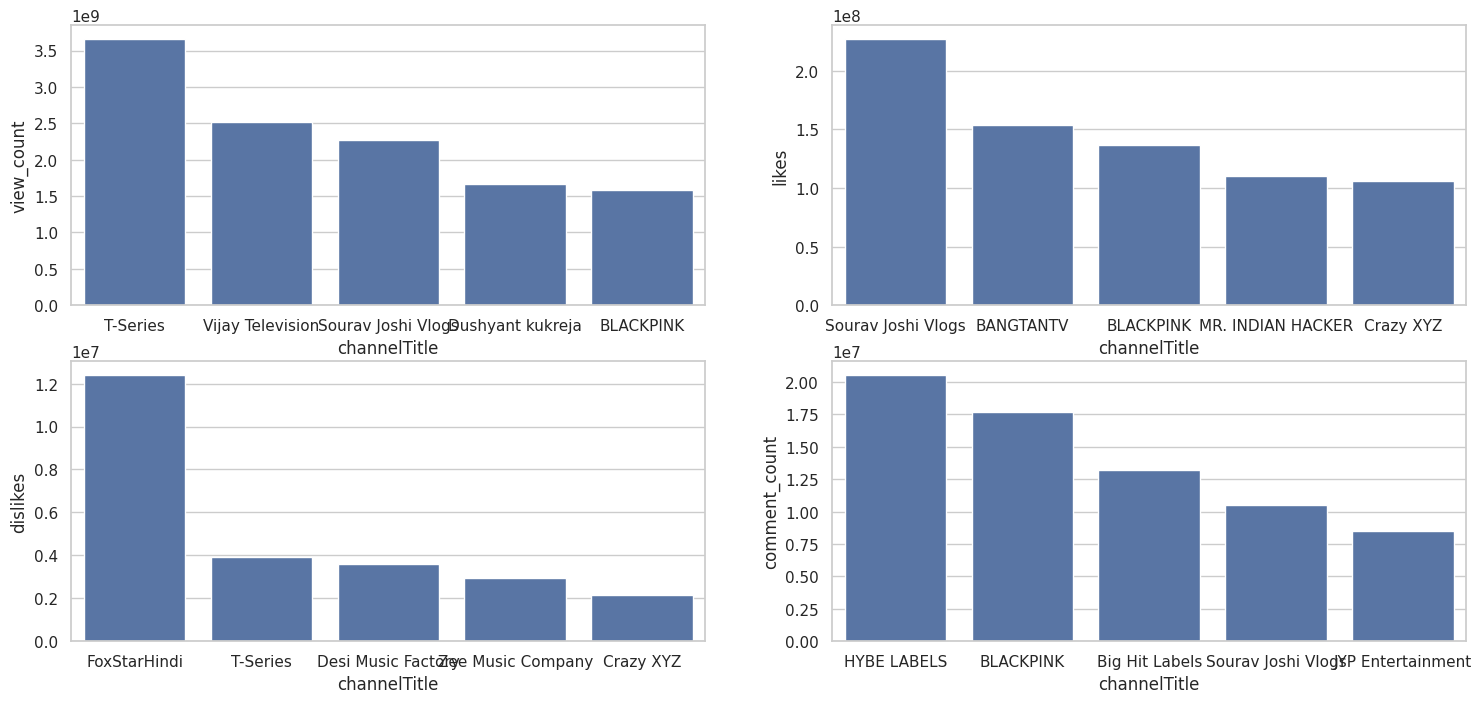

In [34]:
#Plotting the 5 channels with largest view count, likes, dislikes, comment_count
plt.figure(figsize = (18,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = channel_group_df[var_list[i]].nlargest(5).index
    y = channel_group_df[var_list[i]].nlargest(5)
    sns.barplot(x = x,y = y)

T-series seems to be most viewed channel in India. Sourav Joshi vlogs are present in each of the top contenders of views,likes and comments.

FoxStarHindi leads the dislikes section reason being most disliked sadak 2 Movie trailer was from this channel. T-series with only being on in views not likes and comments finds itself in Disliked section.

Most of the disliked videos are coming from Entertainment type of Channels like movie production or music company channels.

BTS(Bangtan Sonyeondan - Korean Bulletproof Boy Scouts - Korean Pop Music Band) Channels are also leading in comments and likes with Korean girls channel Blackpink.

#Most Watched Category

In [35]:
category_group_df = df.groupby('Video_Category')[df.select_dtypes(include='number').columns].sum()
category_group_df

,categoryId,view_count,likes,dislikes,comment_count
Video_Category,,,,,
Anime/Animation,23936,3482502838,104359978,2254845,5221882
Autos & Vehicles,897,2917790934,94689221,3255250,4240977
Classics,6118,563982994,41327903,327773,1317236
Comedy,104940,35250173074,1855464728,37911989,180927951
Drama,167486,20668324845,1315410304,11837539,31107139
Family,77579,9904109894,669315492,7535813,18496941
Foreign,453240,48069360287,2039481608,49099525,62906849
Horror,39475,1541970716,29470756,3153409,3034702
Music,550,421685808,20910828,427127,419151


In [36]:
category_group_df[category_group_df['view_count'] == category_group_df['view_count'].max()]

,categoryId,view_count,likes,dislikes,comment_count
Video_Category,,,,,
Foreign,453240,48069360287,2039481608,49099525,62906849


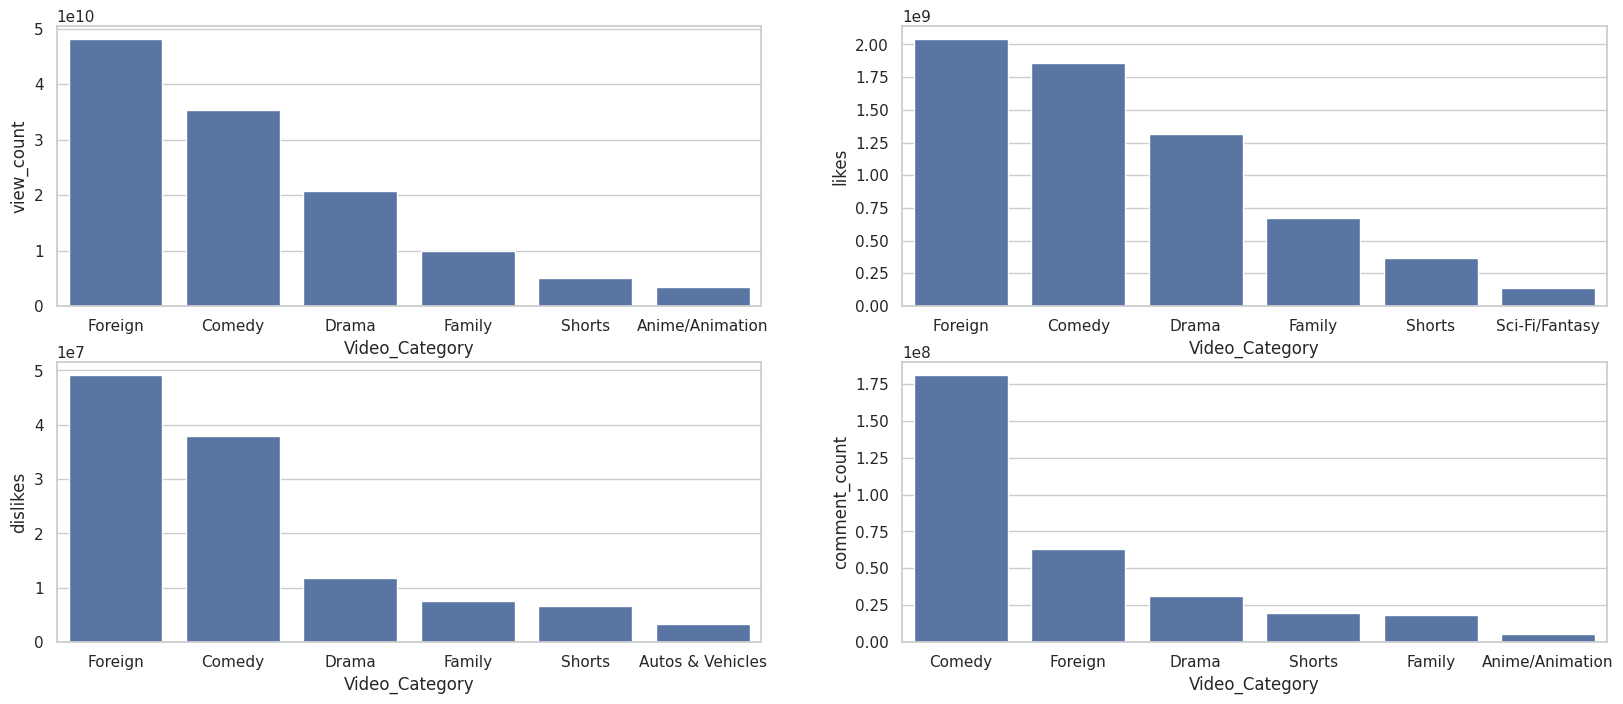

In [37]:
#Plotting the 5 categories with largest view count, likes, dislikes, comment_count}
plt.figure(figsize = (20,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = category_group_df[var_list[i]].nlargest(6).index
    y = category_group_df[var_list[i]].nlargest(6)
    sns.barplot(x = x,y = y)

#Least Watched Category

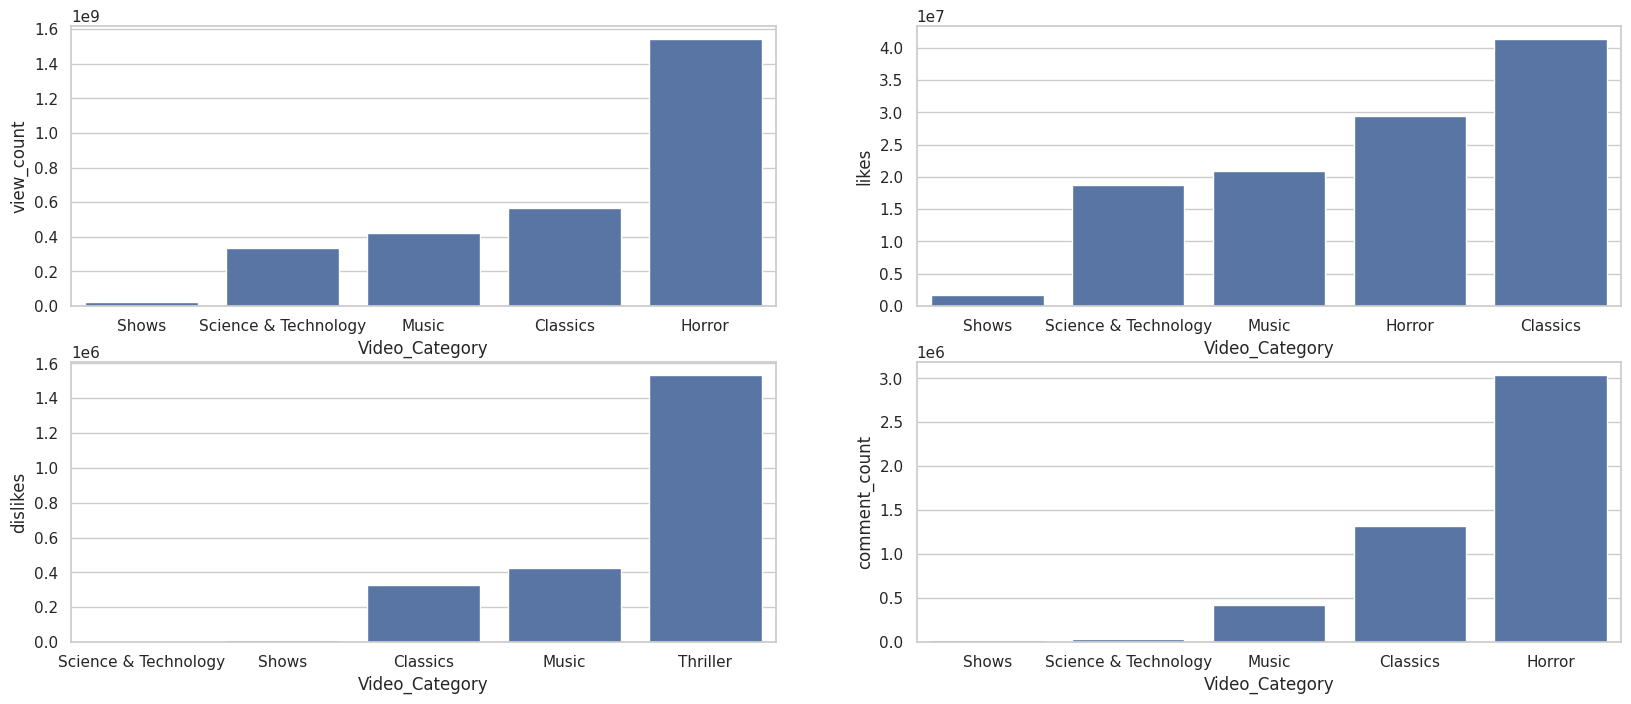

In [38]:
#Plotting the 5 Categories with smallest view count, likes, dislikes, comment_count
plt.figure(figsize = (20,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = category_group_df[var_list[i]].nsmallest(5).index
    y = category_group_df[var_list[i]].nsmallest(5)
    sns.barplot(x = x,y = y)

**Shows** are the least watched category and least like as well

##Follow up Analysis

But is that right way of analysis?

1. Dislikes would be more as there are more views. Shouldn't we consider the percentage ?
2. Does highest views say that the public are highly interested in watching those Category videos?

Let's dive deep further to understand even more



Usually, In most cases, viewers just watch the video and turn to other video without Liking/Disliking/Commenting. But if they responded to a video in like/comment/dislike then that does signifies something and we need to capture that.

Let's create a Response percentage column which signifies the public response to a video and engagement b/w viewers and the video

In [39]:
df_Views_Analysis["Response_Percentage"] = round((( df_Views_Analysis.Likes + df_Views_Analysis.Dislikes ) /df_Views_Analysis.view_count)* 100,2)
df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes,Response_Percentage
0,Anime/Animation,3409452140,101326230,2255995,3.04
1,Autos & Vehicles,2882587134,93430979,3239950,3.35
2,Classics,557540087,40832359,321287,7.38
3,Comedy,34521044813,1822400948,36199368,5.38
4,Drama,20963188680,1330159994,11947340,6.40
5,Family,9694596165,642567874,7348410,6.70
6,Foreign,48004512563,2031051485,48974942,4.33
7,Horror,1533432090,29184442,3136659,2.11
8,Music,406558072,20035514,407200,5.03
9,Sci-Fi/Fantasy,2521392914,143084726,1975857,5.75


#Public Response vs Type of Videos

Text(0, 0.5, 'Public Response(in percentage)')

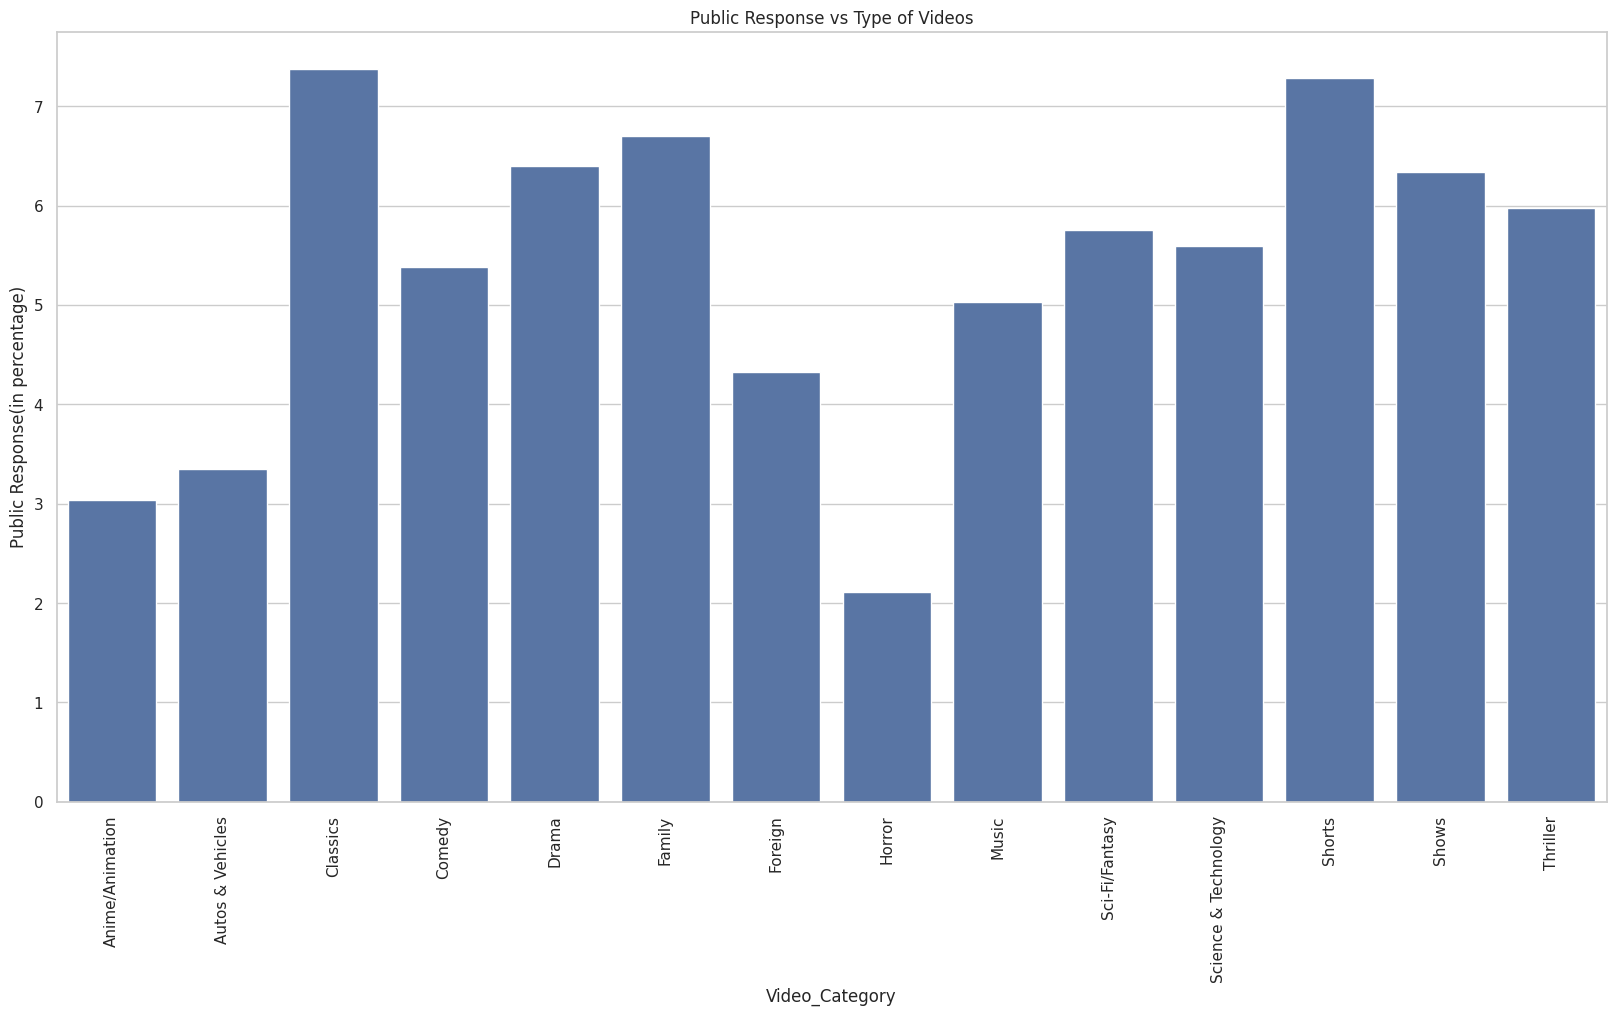

In [40]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Public Response vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.Response_Percentage)

# Add label for vertical axis
plt.ylabel("Public Response(in percentage)")

So now, We can see that Viewers are highly reacting to Classics, Drama, Family, Sports, Sci-fi/Fantacy Videos.

Let's randomly see what those videos are:

In [41]:
df_maxViews[df_maxViews.Video_Category.isin(["Sports", "Classics"])].sample(20)


,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
24800,-TkYmt_VYJ4,"Taking Delivery of Tata Harrier, My New Car !!",2020-12-21T06:30:00Z,Tech Travel Eat by Sujith Bhakthan,19,2020-12-23T00:00:00Z,tech travel eat|sujith bhakthan|malayalam trav...,572694,45268,948,4074,False,False,Taking Delivery of Tata Harrier XZA Plus Dual ...,Classics
143372,S0uofsYzddo,#miniglovevlog Day 37 “ hum aa gaye Delhi” Del...,2022-08-24T02:00:04Z,LittleGlove,19,2022-08-25T00:00:00Z,[None],3170190,262309,0,482,False,False,NaN,Classics
66391,nB_2iofhlE4,"15,000/- രൂപക്ക് “വെള്ള മയിലിനെ”വാങ്ങി!!! | Pr...",2021-07-23T11:30:08Z,Fishing Freaks,19,2021-07-28T00:00:00Z,kerala|fishing|traditional|kerala fishing|snak...,2020446,123347,3044,10601,False,False,GATE Exam ബി.ടെക്കുകാർക്ക് തുറക്കുന്നത് അനവധി ...,Classics
130835,YX8Z91VMpdo,"EP #2 INB Trip First Day from Home, ഒരു വികാരഭ...",2022-06-21T06:30:12Z,Tech Travel Eat by Sujith Bhakthan,19,2022-06-23T00:00:00Z,tech travel eat|sujith bhakthan|malayalam trav...,435334,23192,0,1643,False,False,"EP #2 - കാർ ഞങ്ങൾ ബെഡ്‌റൂം ആക്കിയ, INB Trip Fi...",Classics
143989,i-BxZzq-2NI,Kya aap kisi darpok ko jaante ho? #littleglov...,2022-08-27T13:27:49Z,LittleGlove,19,2022-08-28T00:00:00Z,[None],2263533,146597,0,401,False,False,NaN,Classics
118822,YVTZ_GMVObQ,മുതലക്ക്‌ തിന്നാൻ PLASTIC മീനിനെ കൊടുത്തു!!! |...,2022-04-19T11:30:06Z,Fishing Freaks,19,2022-04-23T00:00:00Z,kerala|fishing|traditional|kerala fishing|snak...,1121586,86810,0,2651,False,False,#YouTubeIndiaVisit our website:https://fishing...,Classics
139955,tyjRL-mptmI,#miniglovevlog Day 19 “kya aap UNO mein jeete ...,2022-08-06T03:16:05Z,LittleGlove,19,2022-08-08T00:00:00Z,[None],7118045,436745,0,524,False,False,NaN,Classics
34280,bo6WaHfn9cU,ഞാൻ 22 ലക്ഷം രൂപയുടെ ബൈക്ക്‌ വാങ്ങി ! Triumph ...,2021-02-12T11:30:07Z,Mallu Traveler,19,2021-02-15T00:00:00Z,[None],633735,67002,3729,4370,False,False,NaN,Classics
18393,BZUbobqoKUU,Papa ne aj apna Din Bana Diya !! WOW 😍,2020-11-16T05:46:39Z,Jatt Prabhjot,19,2020-11-17T00:00:00Z,[None],502765,63816,1226,2222,False,False,"Gud Morning Friends, Sat Shri Akal, Namaste, B...",Classics
33943,b4MkDSRLY3E,Aju Varghese നെ ആയിട്ട് ചൂണ്ട ഇടാൻ പോയി!! Fish...,2021-02-10T11:30:09Z,Fishing Freaks,19,2021-02-13T00:00:00Z,kerala|fishing|traditional|kerala fishing|snak...,1180037,130441,1365,5679,False,False,Special thanks to:Collabo Digital Networkhttps...,Classics


Let's create Similar Percentages and see what they infer

In [42]:
df_Views_Analysis["LikesPercentage"] = df_Views_Analysis.Likes*100/df_Views_Analysis.view_count
df_Views_Analysis["DislikesPercentage"] = df_Views_Analysis.Dislikes*100/df_Views_Analysis.view_count
df_Views_Analysis["Comments"] = df_Comments["comment_count"]
df_Views_Analysis["CommentsPercentage"] = df_Views_Analysis.Comments*100/df_Views_Analysis.view_count
df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes,Response_Percentage,LikesPercentage,DislikesPercentage,Comments,CommentsPercentage
0,Anime/Animation,3409452140,101326230,2255995,3.04,2.971921,0.066169,4980619,0.146083
1,Autos & Vehicles,2882587134,93430979,3239950,3.35,3.241220,0.112397,4177745,0.144930
2,Classics,557540087,40832359,321287,7.38,7.323663,0.057626,1194838,0.214305
3,Comedy,34521044813,1822400948,36199368,5.38,5.279101,0.104862,176844951,0.512282
4,Drama,20963188680,1330159994,11947340,6.40,6.345218,0.056992,30713548,0.146512
5,Family,9694596165,642567874,7348410,6.70,6.628104,0.075799,17219247,0.177617
6,Foreign,48004512563,2031051485,48974942,4.33,4.230960,0.102022,62034194,0.129226
7,Horror,1533432090,29184442,3136659,2.11,1.903211,0.204552,3012019,0.196423
8,Music,406558072,20035514,407200,5.03,4.928082,0.100158,415788,0.102270
9,Sci-Fi/Fantasy,2521392914,143084726,1975857,5.75,5.674829,0.078364,3398208,0.134775


<Axes: xlabel='Video_Category'>

<Figure size 2000x1000 with 0 Axes>

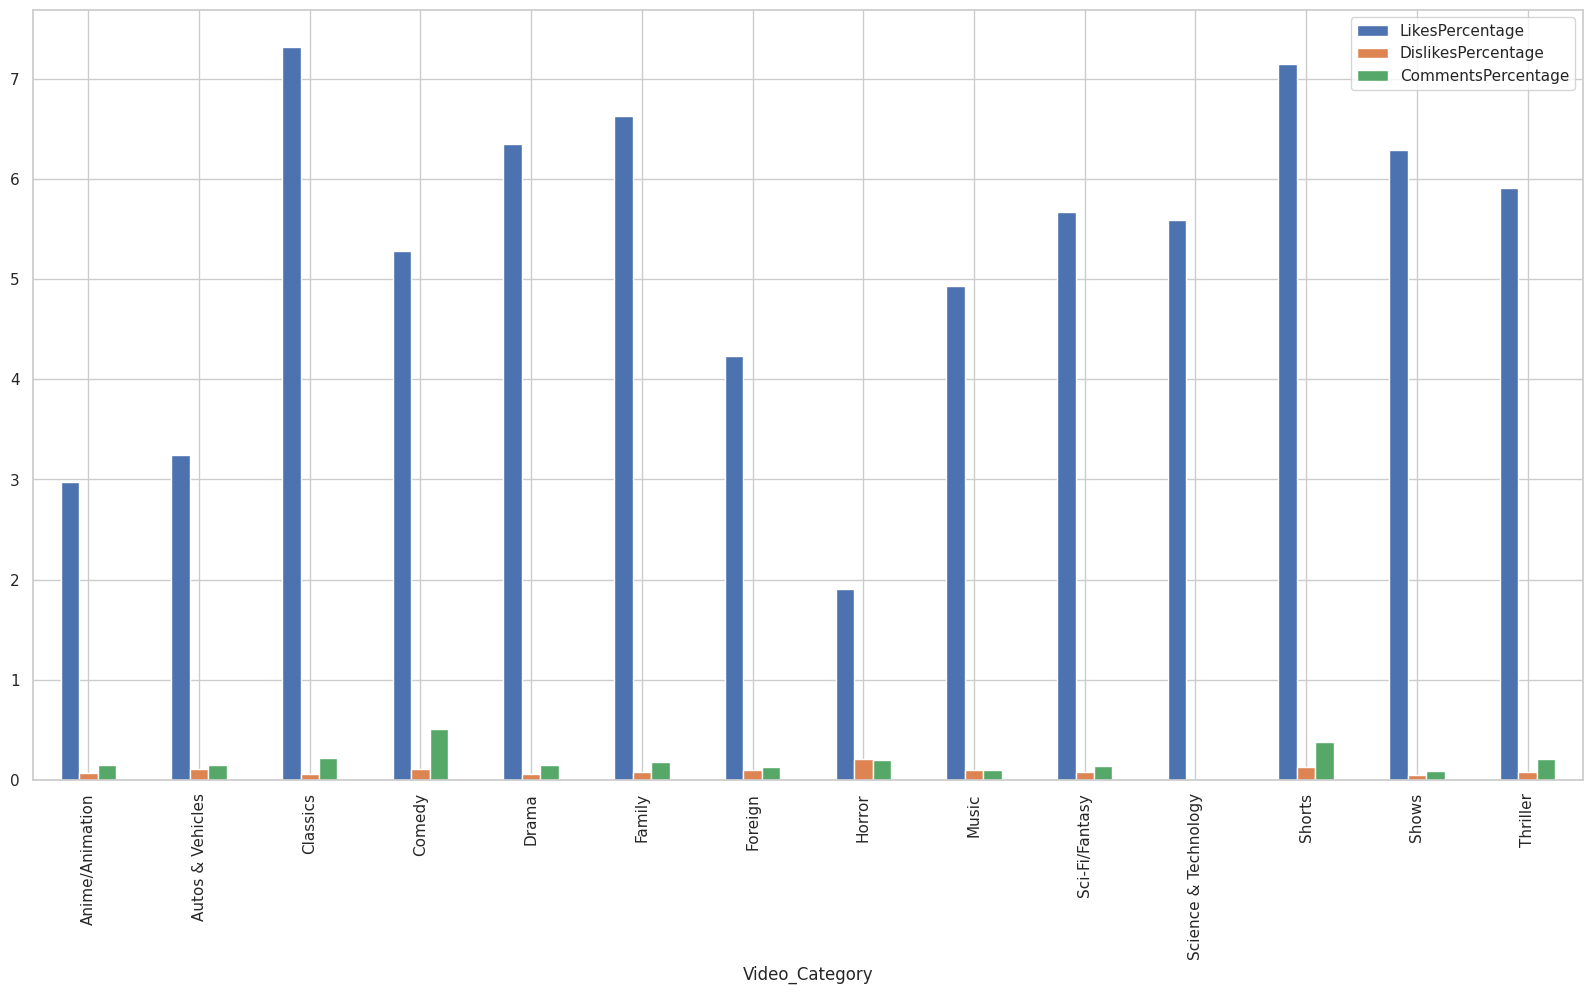

In [43]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

df_Views_Analysis.plot(x="Video_Category", y=["LikesPercentage", "DislikesPercentage", "CommentsPercentage"], kind="bar",figsize=(20,10))

#CommentsPercentage vs Type of Videos

Text(0, 0.5, 'Comments')

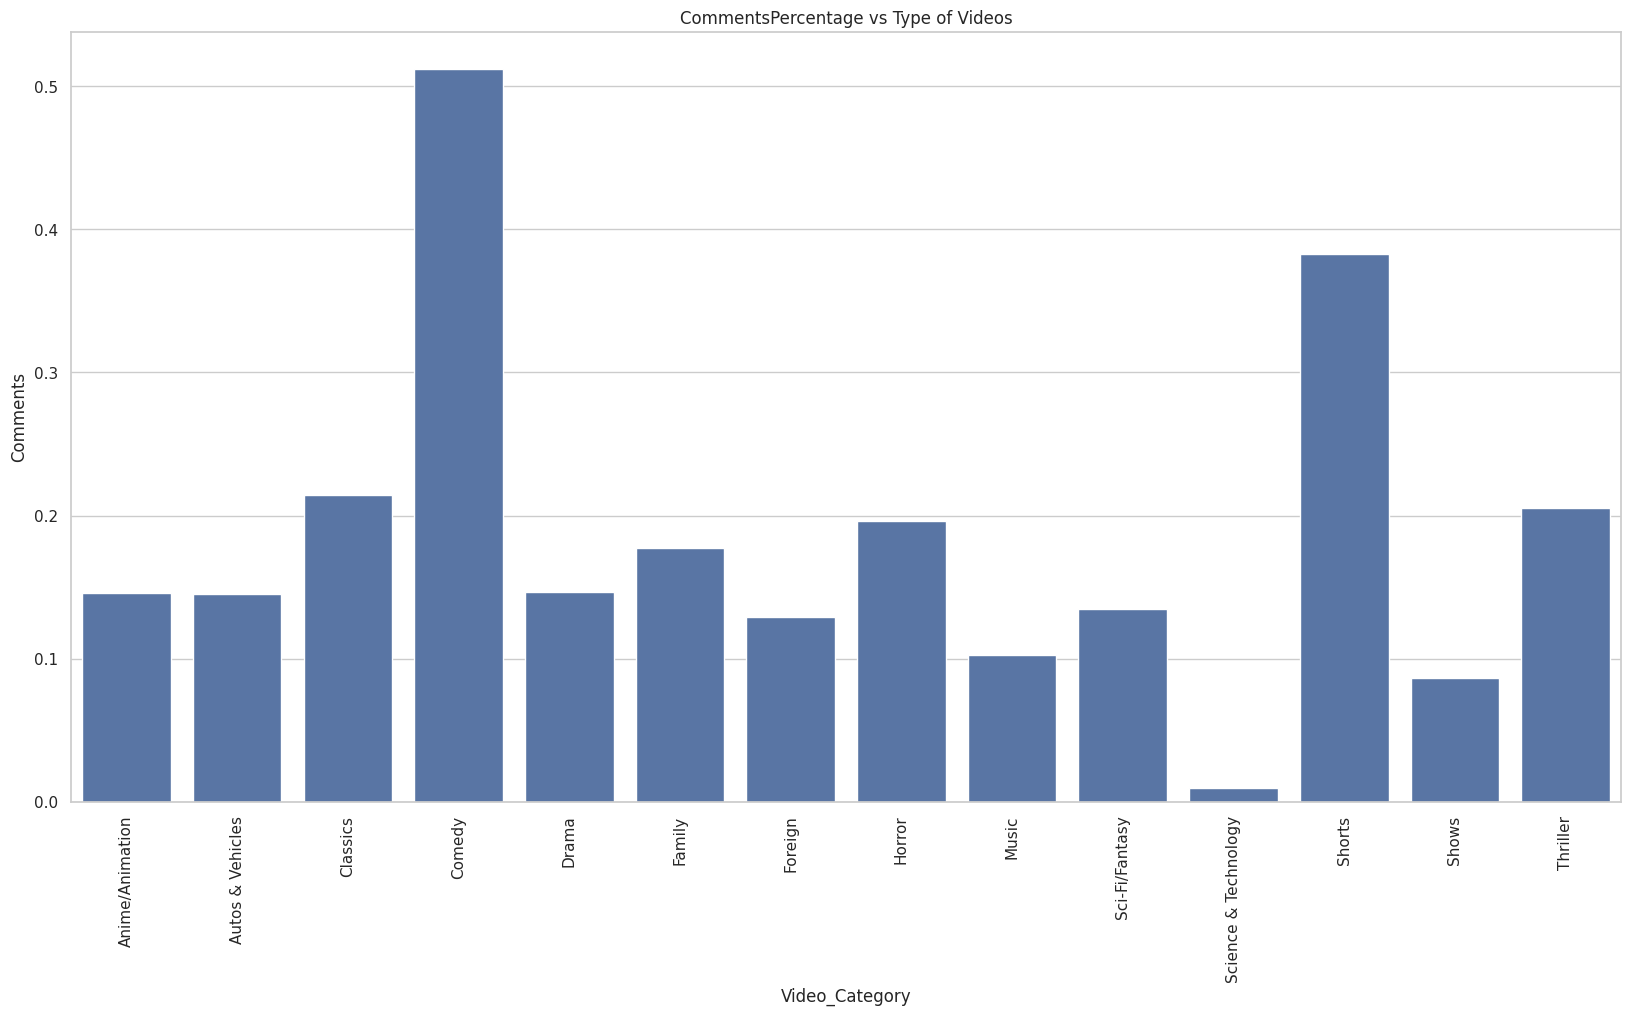

In [44]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("CommentsPercentage vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.CommentsPercentage)

# Add label for vertical axis
plt.ylabel("Comments")

Comedy and Shorts has the most comments.

Text(0, 0.5, 'Dislikes')

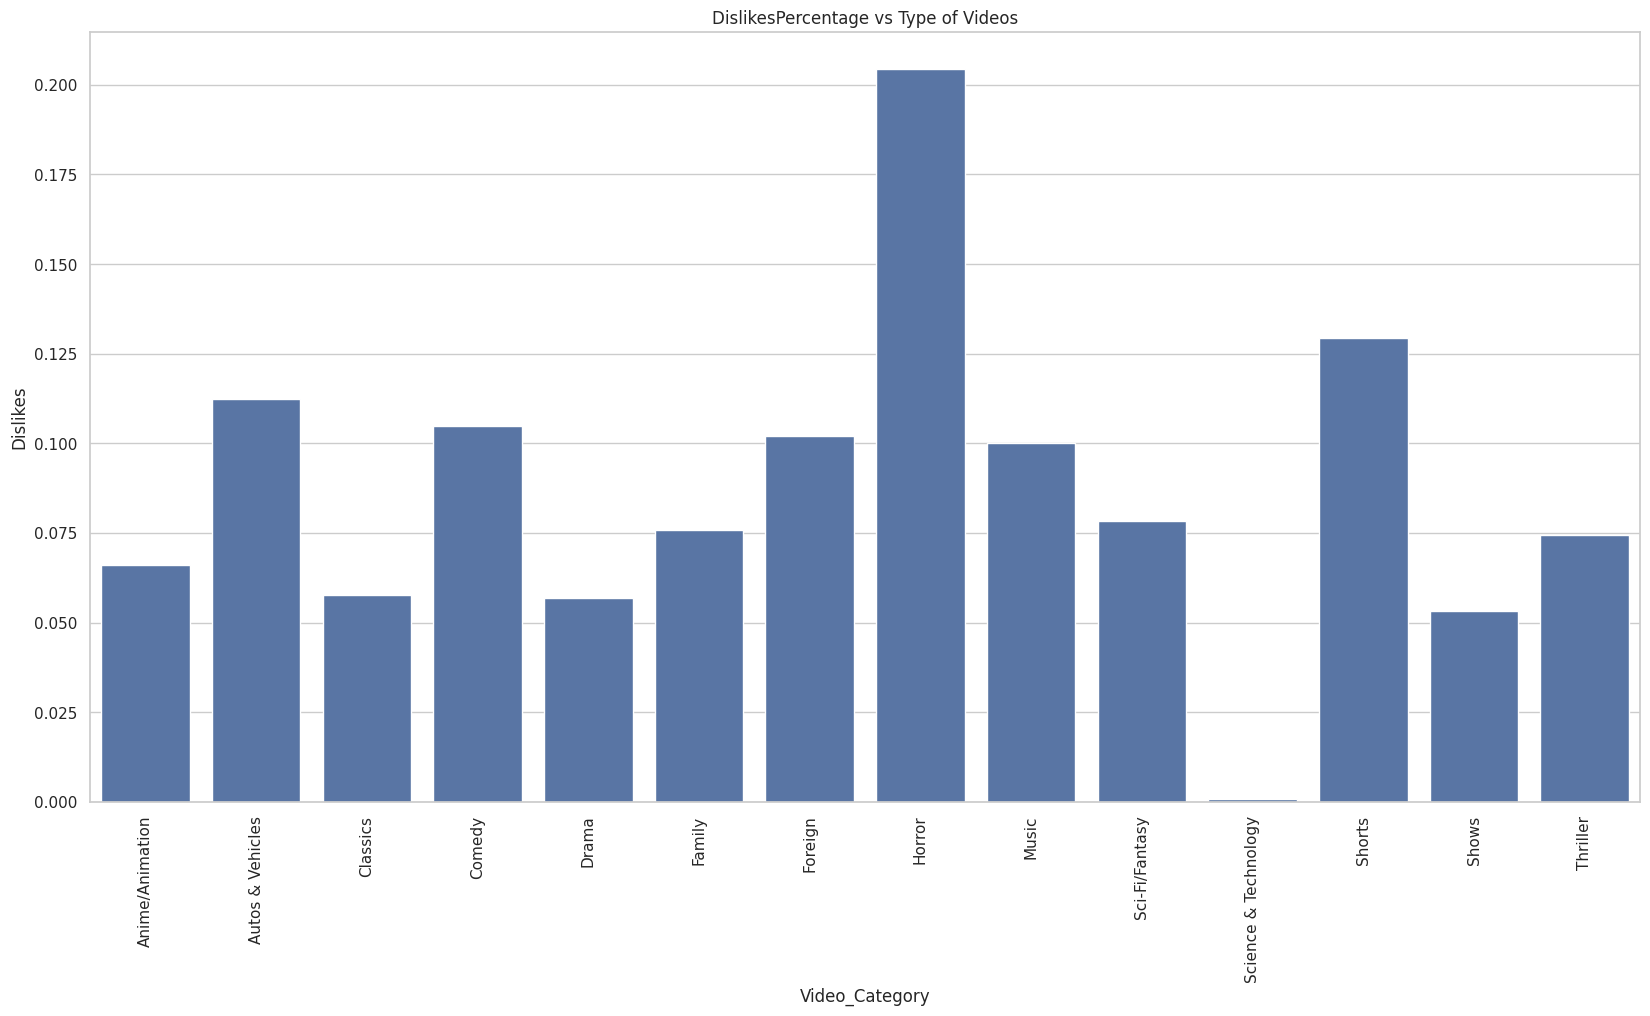

In [45]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

# Add title
plt.title("DislikesPercentage vs Type of Videos")

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.DislikesPercentage)

# Add label for vertical axis
plt.ylabel("Dislikes")

**Horror** movies seems to receive the most dislikes

#LikesPercentage vs Type of Videos

Text(0, 0.5, 'Likes')

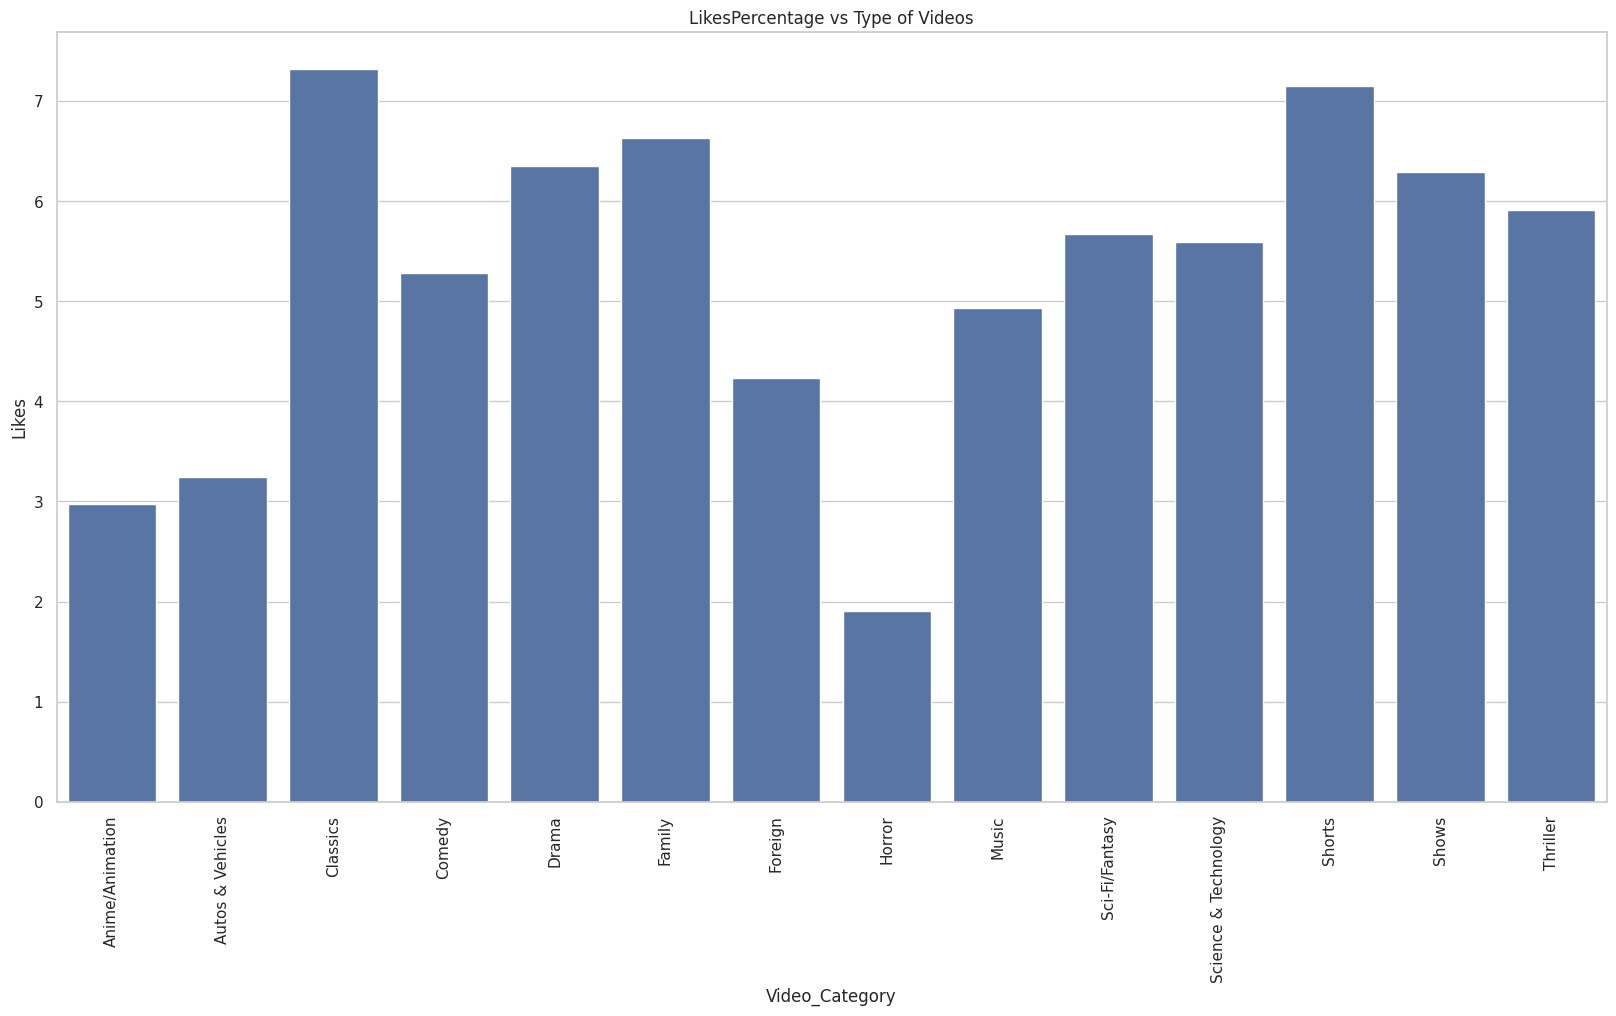

In [46]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

# Add title
plt.title("LikesPercentage vs Type of Videos")

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.LikesPercentage)

# Add label for vertical axis
plt.ylabel("Likes")

**Classics, Shorts** and **Family** movies seems to receive the most likes

<br>

#Channel Analysis

In [47]:
df_Channel = df_maxViews.groupby('channelTitle')["view_count"].sum().reset_index()
df_Like = df_maxViews.groupby('channelTitle')["likes"].sum().reset_index()
df_Dislike = df_maxViews.groupby('channelTitle')["dislikes"].sum().reset_index()
df_Comments = df_maxViews.groupby('channelTitle')["comment_count"].sum().reset_index()
df_Channel["Likes"] = df_Like.likes
df_Channel["Dislikes"] = df_Dislike.dislikes
df_Channel["Comments"] = df_Comments.comment_count

df_Channel.sample(10)

,channelTitle,view_count,Likes,Dislikes,Comments
3562,VIP Records,32489700,1229257,9094,62239
1346,Hyderabad Diaries More,1282615,92489,3646,9409
67,ABP Nadu,2211572,45882,1234,2168
3231,TV9 Today,6109196,0,0,3023
2011,Movies Insight Hindi,1929254,90750,4032,2128
300,Anshu Bisht,36766084,3356276,1909,167969
570,Burfi Music,91150346,1970332,24975,115966
1966,Ministry of Women & Child Development Govt of ...,43892,1640,119,0
1953,Middle Class Ammaye Rama,122717,3425,697,387
2226,Noel,1078313,78991,5840,2925


In [48]:
df_Channel.sort_values('view_count', ascending=False).iloc[:25,:]

,channelTitle,view_count,Likes,Dislikes,Comments
3174,T-Series,3605729251,96610966,3847392,6630593
3624,Vijay Television,2546942360,54654378,909236,3134836
3027,Sourav Joshi Vlogs,2248052445,223933074,1032729,10369759
915,Dushyant kukreja,1667219165,97914610,1859647,336732
442,BLACKPINK,1583164945,136256960,1912398,17694285
2042,MrBeast,1256389734,83415829,566834,4691285
726,Crazy XYZ,1213024080,105160576,2131297,6286459
174,Ajay Sharma,1092146916,55418519,1379520,92375
3009,Sony Music India,1020569225,22149631,1065808,2987260
1260,HYBE LABELS,1016062898,102838507,531216,20575336


#Channel vs total views

Text(0, 0.5, 'Total Views')

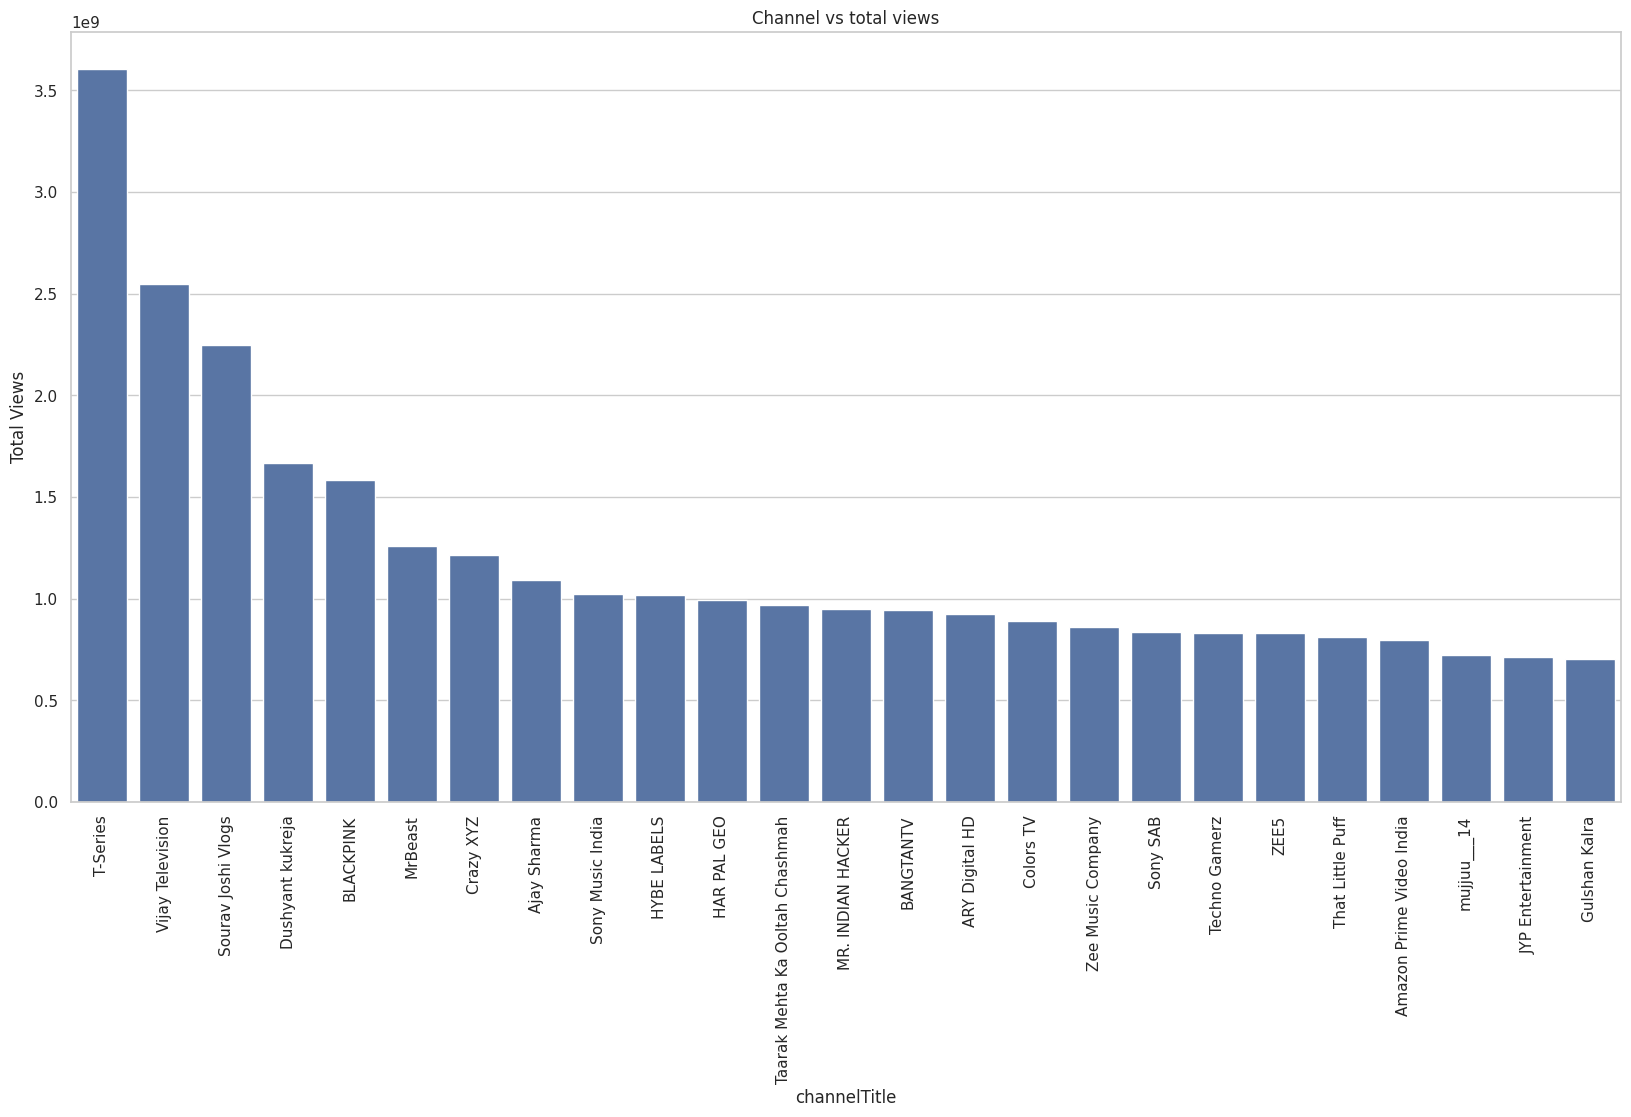

In [49]:
Channel_Views = df_Channel.sort_values('view_count', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total views")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.view_count)

# Add label for vertical axis
plt.ylabel("Total Views")

#Channel vs total Likes

Text(0, 0.5, 'Total Likes')

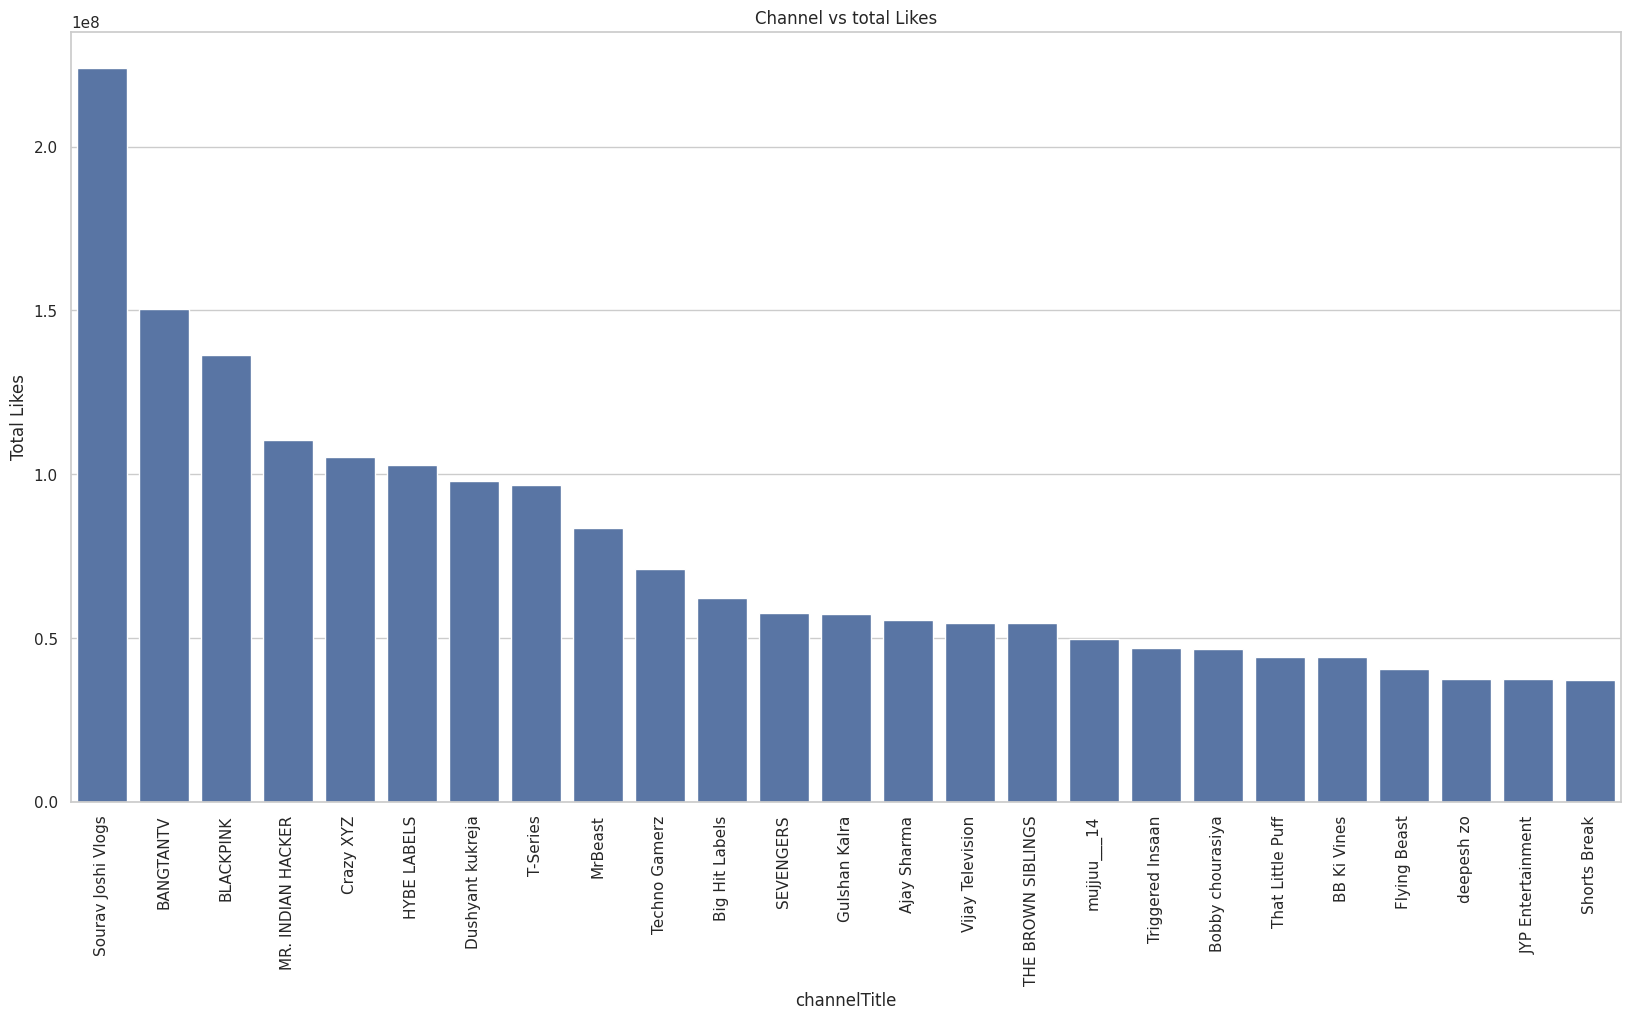

In [50]:
Channel_Views = df_Channel.sort_values('Likes', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total Likes")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.Likes)

# Add label for vertical axis
plt.ylabel("Total Likes")


#Channel vs total Comments

Text(0, 0.5, 'Total Comments')

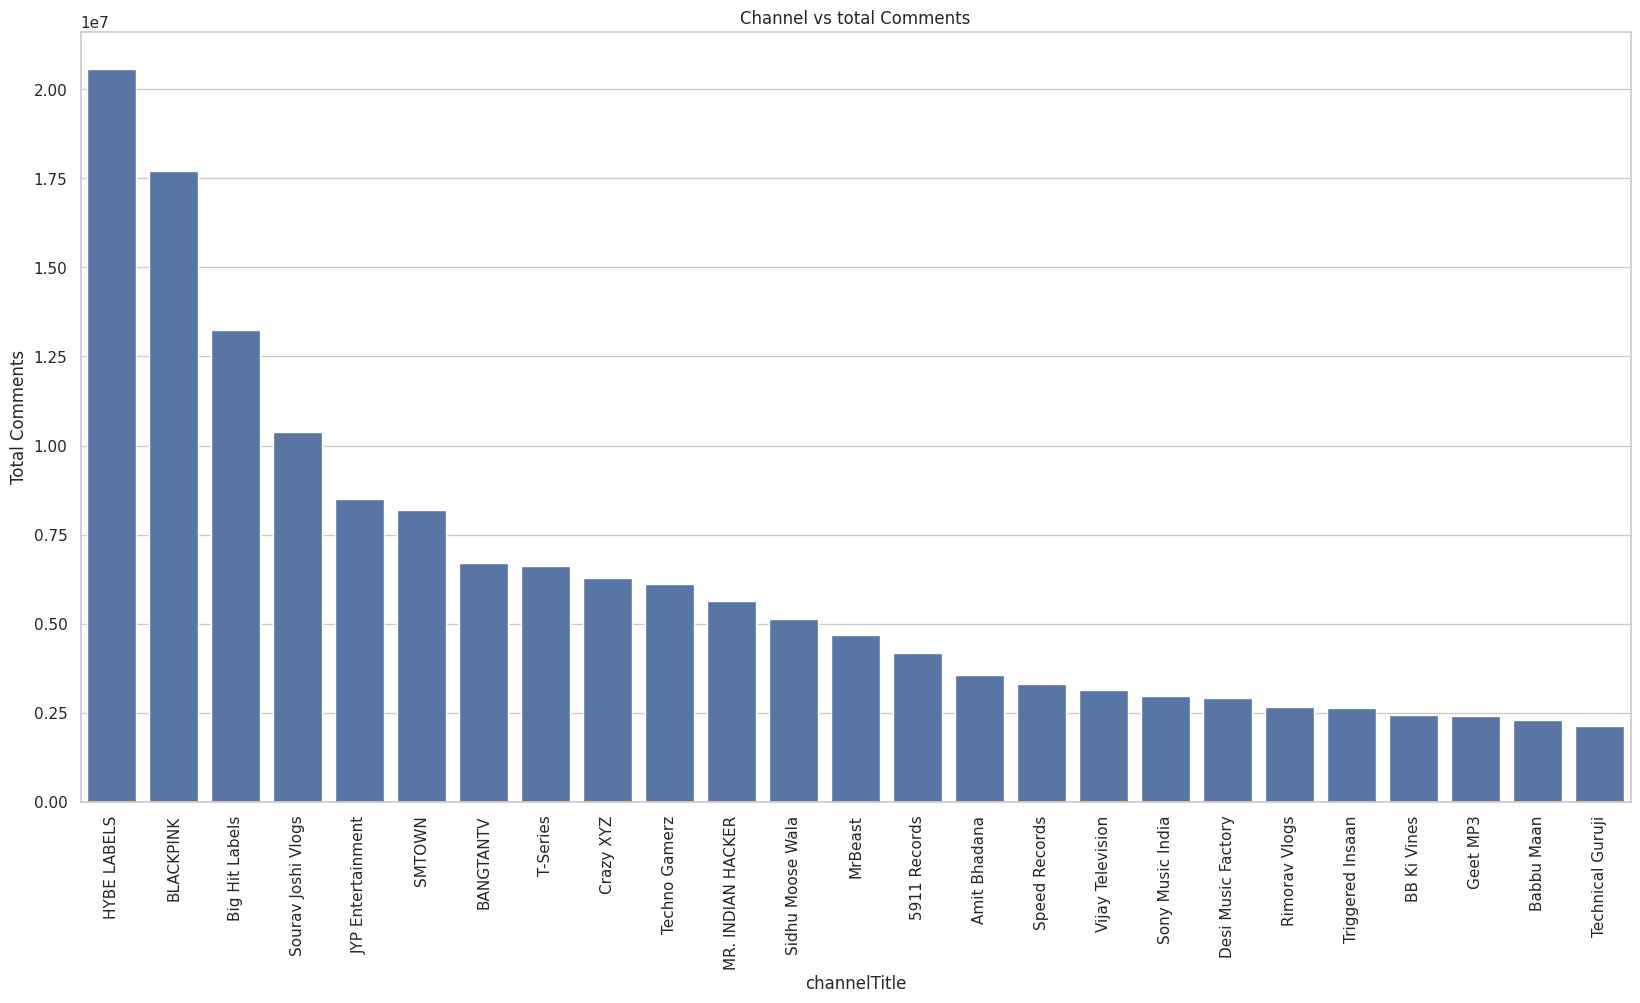

In [51]:
Channel_Views = df_Channel.sort_values('Comments', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total Comments")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.Comments)

# Add label for vertical axis
plt.ylabel("Total Comments")

<br>

##Let's try some different analysis now

In [52]:
NoOfDaysInTrending = dict(df.groupby('video_id')['view_count'].count())
NoOfDaysInTrending

{'--9rRxqTdjQ': np.int64(1),
 '--GS_EPuuMc': np.int64(1),
 '--L_wDHUaxY': np.int64(1),
 '--WGlFF6-yw': np.int64(1),
 '--vmXGvtqxQ': np.int64(1),
 '--xmP5nOoLM': np.int64(1),
 '-00zRvr9zyA': np.int64(1),
 '-05Hay2JrKg': np.int64(1),
 '-0Da_UPrV10': np.int64(1),
 '-0PR_BkK60E': np.int64(1),
 '-0Qa7hB2vXI': np.int64(1),
 '-0SOJVfKX00': np.int64(1),
 '-0beFQnB5lY': np.int64(1),
 '-0gtaC4AzHA': np.int64(1),
 '-0ldvhBlL-k': np.int64(2),
 '-0oRa0QXx6I': np.int64(1),
 '-0udX1wZ82U': np.int64(1),
 '-0wc4B969z0': np.int64(1),
 '-13QFm5vAoY': np.int64(1),
 '-19EvIcr9ZA': np.int64(1),
 '-1EIBWRRj4U': np.int64(1),
 '-1ImKHHc7Ck': np.int64(2),
 '-1QZHe8x2G0': np.int64(1),
 '-1dLG2z61hQ': np.int64(1),
 '-1ddUMd4BRw': np.int64(1),
 '-1i1gagGtu4': np.int64(1),
 '-1kFl7EWFqs': np.int64(1),
 '-1lRI4dseeA': np.int64(1),
 '-1pQX88fnUQ': np.int64(1),
 '-28tVGVeM_Q': np.int64(1),
 '-29uvnpHjpI': np.int64(1),
 '-2CYiqoM3BA': np.int64(1),
 '-2DOCcpdTS0': np.int64(1),
 '-2RBOk_RzA0': np.int64(1),
 '-2RJTVPSOPc'

In [53]:
def fetch_video_times(value):
    return NoOfDaysInTrending.get(value, 0)  # Safe lookup

Let's try to find the Channels that have their videos in trending for most of the times.


In [54]:
df_maxViews["times_in_trending"] = df_maxViews.video_id.apply(fetch_video_times)
df_maxViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category,times_in_trending
66655,gwPYRM6JVRc,Shareek Part 3 • Lust For Land • Jaggie Tv,2021-07-30T01:00:11Z,Jaggie Tv,24,2021-07-30T00:00:00Z,shareek part 3|shareek jaggie tv|shareek part ...,138486,17729,390,2591,False,False,Download RummyCircle App Now and Get ₹ 2000 We...,Foreign,1
10788,oky5wt5nfX8,Going out for Shopping - after long 😍,2020-10-06T15:33:43Z,Mohit Chhikara,24,2020-10-07T00:00:00Z,mohit|mohit chhikara|mohit chhikara vlog|mohit...,340053,50045,625,2538,False,False,so guys stay tuned for upcoming room tour vlog...,Foreign,1
60845,VV_QKhwQSQA,Naam Iruvar Namakku Iruvar | 28th June to 2nd ...,2021-06-27T07:42:38Z,Vijay Television,24,2021-06-30T00:00:00Z,Fiction|நெடுந்தொடர்|தமிழ்|விஜய்|டிவி|தொலைக்காட...,2765842,53568,1091,833,False,False,#NaamIruvarNamakkuIruvar #NINI #RJSenthil #Ara...,Foreign,1
80625,udDWM-RttiQ,Shopping for Baby Beast #2,2021-10-09T08:56:24Z,Flying Beast,22,2021-10-10T00:00:00Z,vlogs|vlog|indian|vlogger|flying|beast|tech|re...,1824659,156871,1428,4617,False,False,Vlog # Gaurav's Instagram https://www.instagra...,Drama,1
66782,_A7QA648YCw,Why COVID Vaccination Is So Important For The ...,2021-07-10T08:45:01Z,MyGov India,25,2021-07-30T00:00:00Z,cowin portal|latest covid information|how to r...,291693,0,0,49,False,True,"Dr V K Paul, Member of Health, NITI Aayog sugg...",Horror,1


Top 25 Videos that are in trending for many days

In [55]:
df_trend_video_tt = df_maxViews.sort_values('times_in_trending', ascending=False).iloc[:25,:]
df_trend_video_tt

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category,times_in_trending
18951,fH53um9coSk,Keh Len De | Kaka | New Punjabi Songs 2020 | F...,2020-11-12T07:50:25Z,Single Track Studio,10,2020-11-20T00:00:00Z,Punjabi Songs|Latest Punjabi Songs|Pollywood|A...,12792140,387957,8818,19567,False,False,#KehLenDe #KaKa #LatestPunjabiSongs2020 #NewPu...,Comedy,5
57594,vA8h5OxKkQ4,distributing masks made with money😮,2021-06-09T05:25:00Z,Harsha Sai - For You,24,2021-06-14T00:00:00Z,#telugu #harshasai,895951,92627,1072,6192,False,False,"subscribe @Harsha Sai - For You , I might call...",Foreign,5
139594,pkQqC51oykg,Crafting Most Epic Rocket Shoes to FLY in Mine...,2022-08-02T07:45:06Z,Carry Depie,20,2022-08-06T00:00:00Z,minecraft|minecraft java edition|minecraft hin...,918513,29432,0,1389,False,False,in this video i am buying most epic shoes in m...,Comedy,4
138607,e3TYWx7HqLM,Big Brain Among Us Shapeshifter Impostor Plays,2022-07-28T09:00:32Z,Live Insaan,20,2022-08-01T00:00:00Z,Triggered Insaan|Live Insaan|funny|comedy|amon...,1432378,129074,0,4146,False,False,Today we are playing Among Us again since the ...,Comedy,4
78016,4J0pg1LmhQg,Mehendi - Song| Dhvani Bhanushali | Gurfateh| ...,2021-09-21T06:00:16Z,Dhvani Bhanushali,10,2021-09-27T00:00:00Z,mehendi|dhvani bhanushali|dhvani|vaaste|navrat...,27927728,807538,42031,43017,False,False,Vinod Bhanushali presents Dhvani Bhanushali’s ...,Comedy,4
37206,Cepo69WEr88,New Hindi Songs | Pawri (Party) Ho Rai Hai | P...,2021-02-24T05:29:15Z,Desi Junction,10,2021-03-02T00:00:00Z,New Hindi Songs|Danish Alfaaz|Muskaan Sharma|D...,4169665,150125,33076,7146,False,False,Desi Junction & Jassi Lohka Presents Pawri (P...,Comedy,4
66563,WPX7Ab-yQfY,Funniest Things People Actually GOOGLE About M...,2021-07-26T07:00:44Z,Triggered Insaan,23,2021-07-29T00:00:00Z,triggered insaan|live insaan|qna|funny|answeri...,4829268,704172,8692,39464,False,False,Today I am roasting myself in form of a QNA vi...,Family,4
53515,VsMR_RDpX7k,YEH SAALI AASHIQUI | When You're In Love With ...,2021-05-29T08:57:27Z,So Effin Cray,24,2021-06-03T00:00:00Z,so effin cray|so effin cray latest|so effin cr...,697960,62747,1820,2374,False,False,"Download India's simplest Bitcoin app, CoinDCX...",Foreign,4
102223,d9gQhno4VjE,Becoming a Professional Instagram Reeler!?? | ...,2022-01-23T07:00:10Z,Triggered Insaan,23,2022-01-29T00:00:00Z,triggered insaan|live insaan|funny|comedy|reel...,4965170,770478,0,33879,False,False,I Joined a new Age Content Agency to become a ...,Family,4
112499,AuLyfXUfNp4,Thara Bhai Joginder Became My Best Friend😂 aft...,2022-03-16T07:00:02Z,Triggered Insaan,23,2022-03-22T00:00:00Z,triggered insaan|live insaan|funny|comedy|thar...,5561041,677099,0,23052,False,False,"Sab kuch tod diya, sab kuch phod diya, ab bas ...",Family,3


<br>

Top Channels whose video is in trending for most of the times

#Channel's Video vs no.of times in Trending

Text(0, 0.5, 'no.of trending')

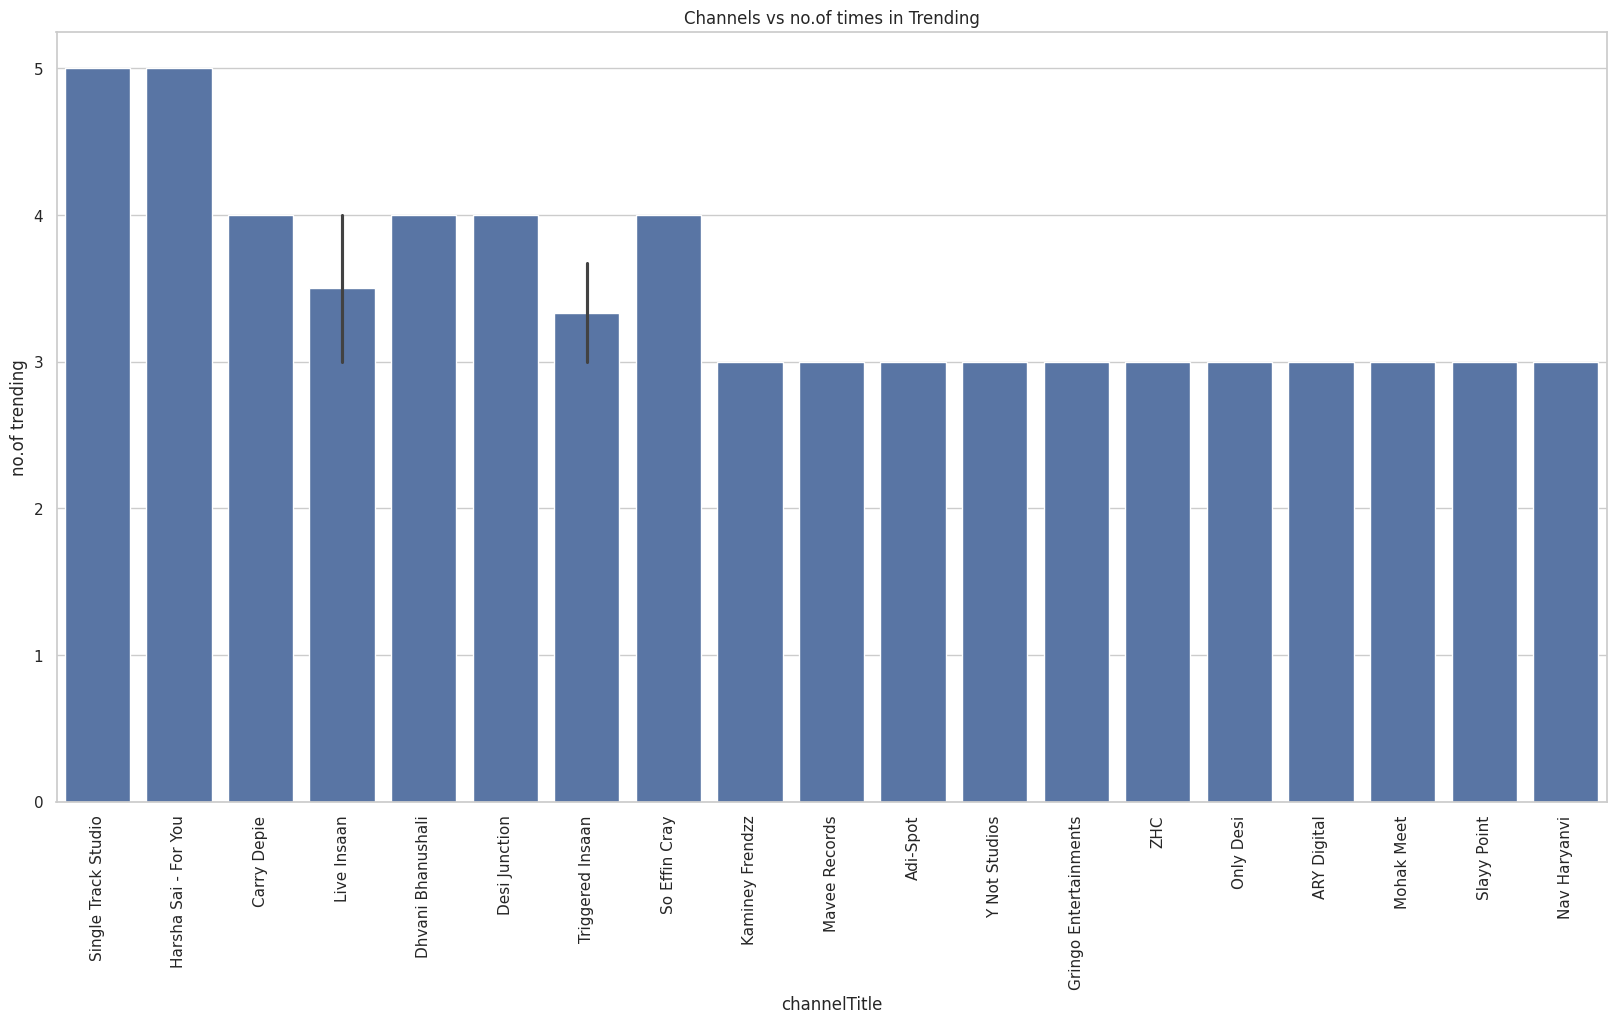

In [56]:
#Top 20 videos with most no.of times in trending(Channel wise)

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channels vs no.of times in Trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_trend_video_tt.channelTitle, y=df_trend_video_tt.times_in_trending)
#sns.violinplot(x = df_trend_video_tt.channelTitle, y = df_minViews.DaysTakenToBeOnTrending )

# Add label for vertical axis
plt.ylabel("no.of trending")

<br>


Top 30 Channels whose Videos are in Trending

In [57]:
df_Channel_Trending = df_maxViews.groupby("channelTitle")["times_in_trending"].sum().reset_index()
df_Channel_Trending["Majority_Videos_Category_Type"] = df_maxViews.groupby('channelTitle')['Video_Category'].agg(pd.Series.mode).reset_index()["Video_Category"]
df_Channel_Trending = df_Channel_Trending.sort_values('times_in_trending', ascending=False).iloc[:30,:]
df_Channel_Trending

,channelTitle,times_in_trending,Majority_Videos_Category_Type
3624,Vijay Television,949,Foreign
698,Colors TV,844,Foreign
3783,ZEE5,538,Foreign
374,Asianet,486,Foreign
697,Colors Rishtey,484,Foreign
3015,Sony SAB,453,Foreign
3027,Sourav Joshi Vlogs,441,Drama
726,Crazy XYZ,393,Shorts
3238,Taarak Mehta Ka Ooltah Chashmah,285,Foreign
1781,MR. INDIAN HACKER,248,Shorts


# Channel vs total no.of times in trending

Text(0, 0.5, 'no.of times in trending')

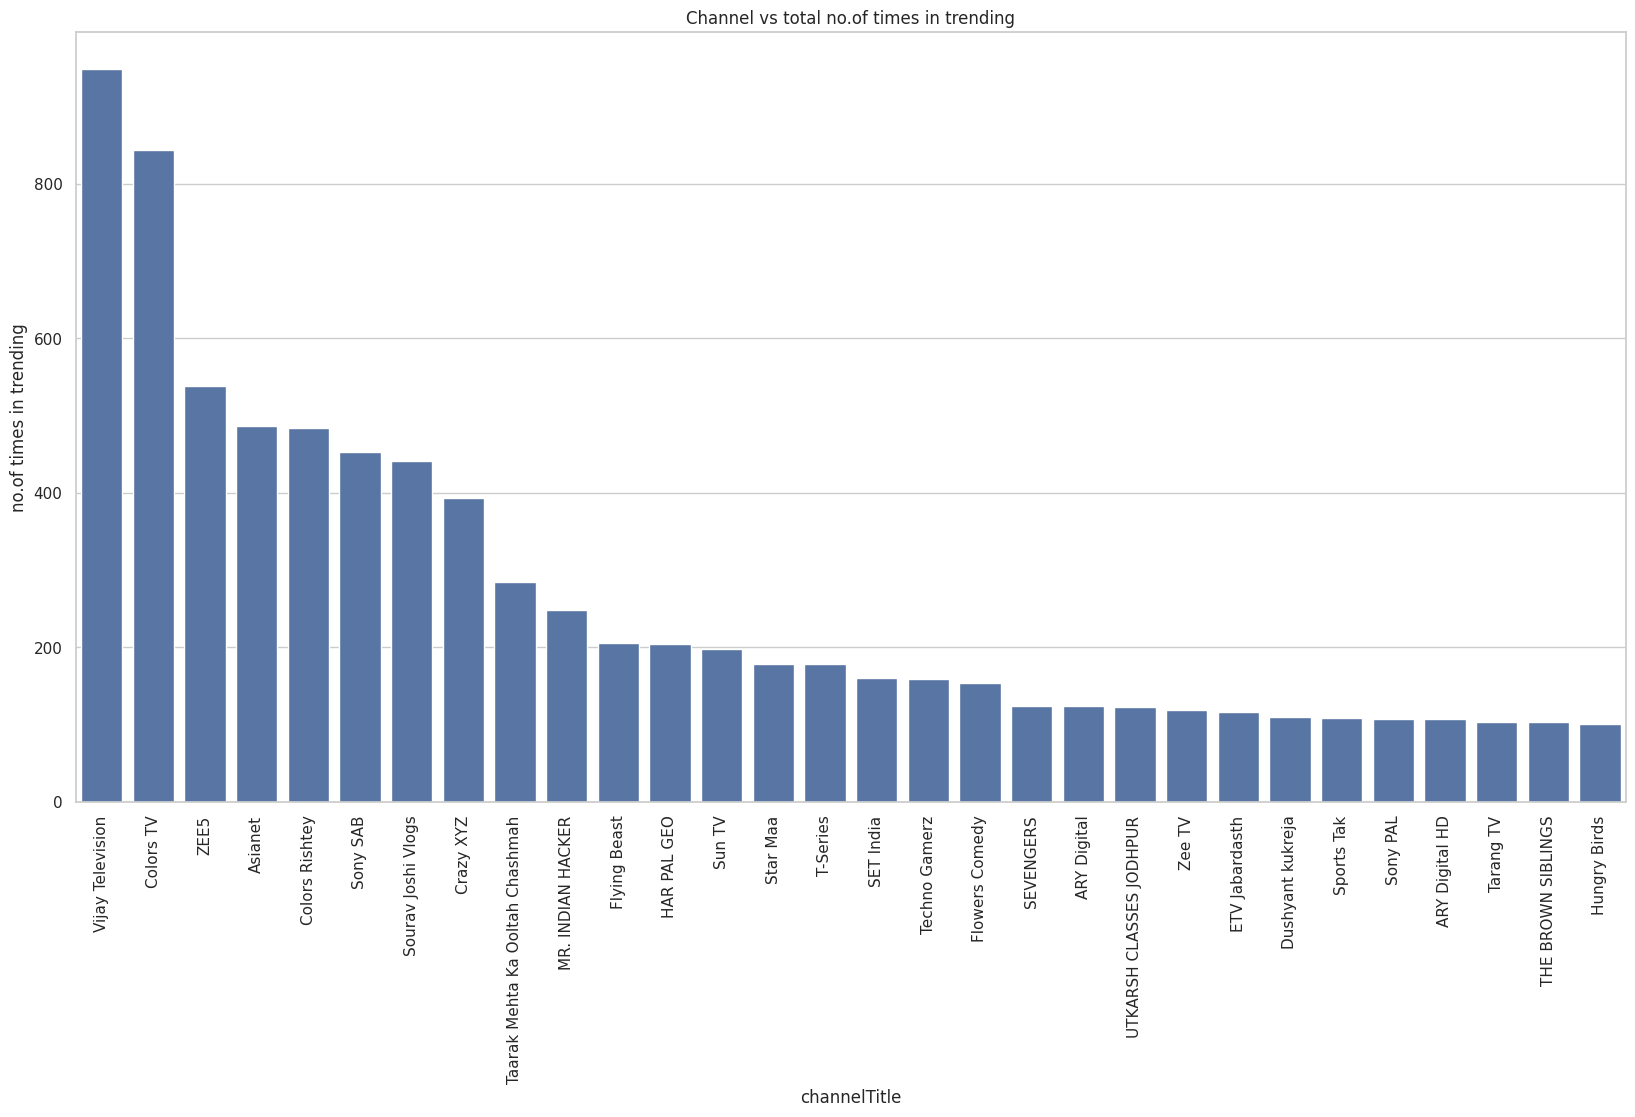

In [58]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total no.of times in trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_Channel_Trending.channelTitle, y=df_Channel_Trending.times_in_trending)

# Add label for vertical axis
plt.ylabel("no.of times in trending")

Category of the Videos Uploaded of Top Channels which are in Trending

#Category vs total no.of times in trending

Text(0, 0.5, 'no.of times in trending')

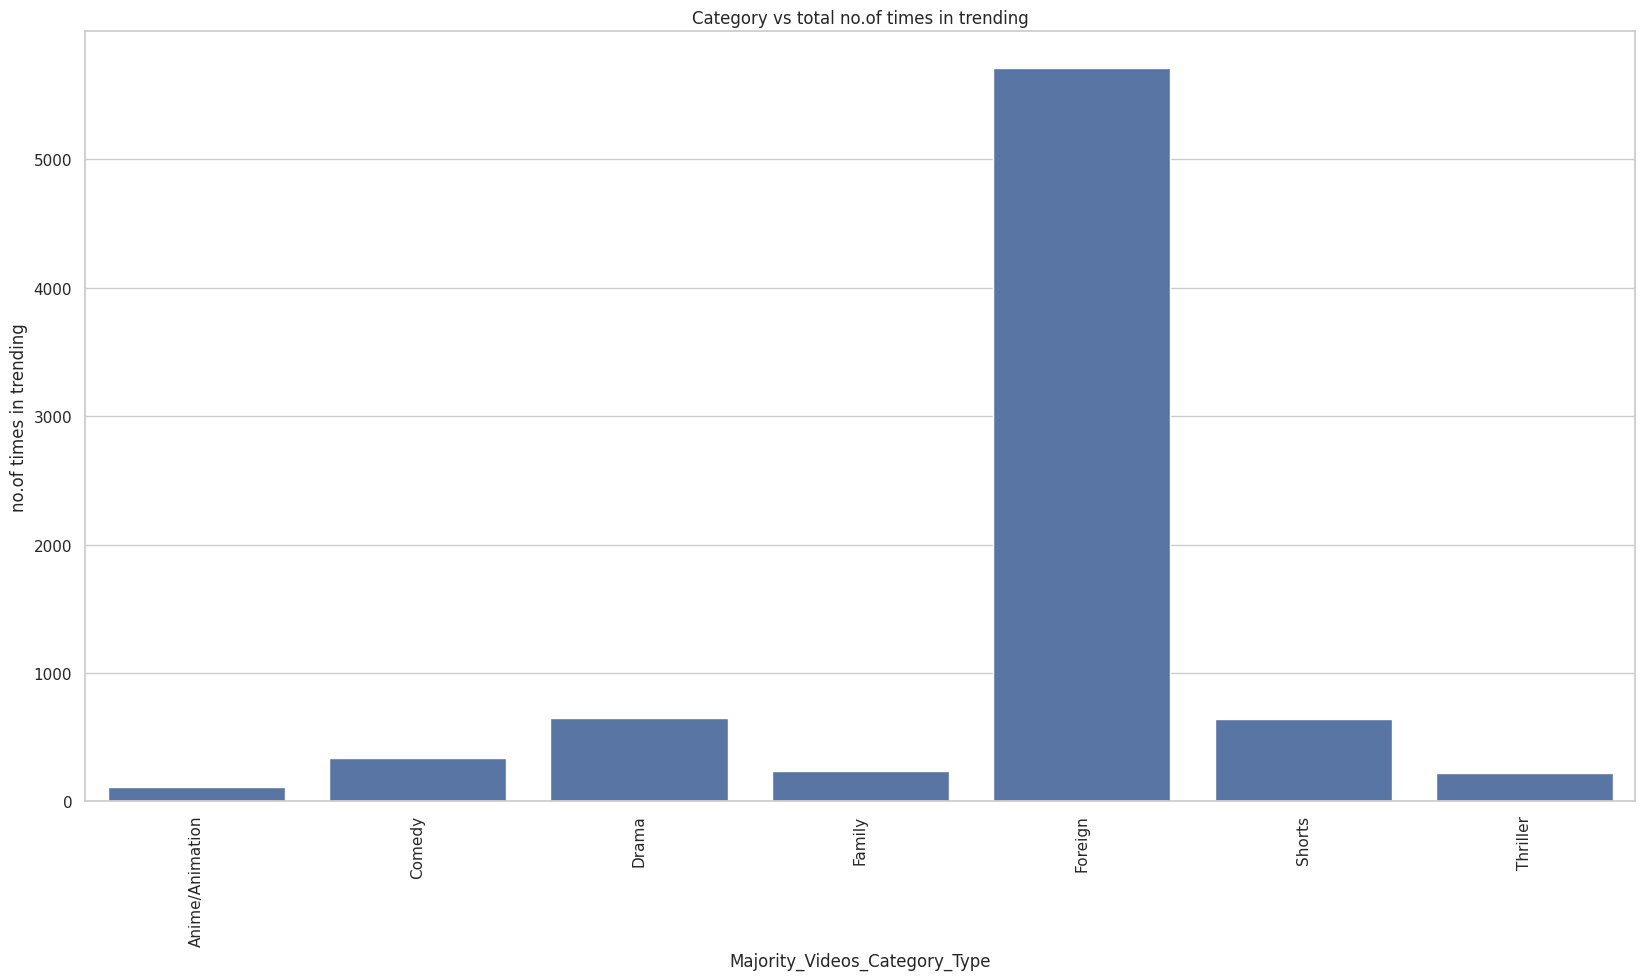

In [59]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Category vs total no.of times in trending")
plt.xlabel
plt.xticks(rotation=90)
Category_Trending = df_Channel_Trending.groupby("Majority_Videos_Category_Type")["times_in_trending"].sum().reset_index()
sns.barplot(x=Category_Trending.Majority_Videos_Category_Type, y=Category_Trending.times_in_trending)

# Add label for vertical axis
plt.ylabel("no.of times in trending")

<br>

Let's create a column which calculates no.days took for the video to be in Trending. 0 being less than 24hrs

In [60]:
df_minViews.trending_date

,trending_date
74788,2021-09-11T00:00:00Z
98392,2022-01-10T00:00:00Z
47846,2021-04-28T00:00:00Z
17317,2020-11-11T00:00:00Z
2760,2020-08-26T00:00:00Z
...,...
60487,2021-06-29T00:00:00Z
51371,2021-05-21T00:00:00Z
27368,2021-01-08T00:00:00Z
63673,2021-07-15T00:00:00Z


In [61]:
df_minViews["JoinedTrending"] = pd.to_datetime(df_minViews.trending_date.str.split(',\s*').str[0]) #\s means matches "any whitespace character"
df_minViews["UploadedTime"] = pd.to_datetime(df_minViews.publishedAt.str.split(',\s*').str[0])
df_minViews["DaysTakenToBeOnTrending"] = (df_minViews["JoinedTrending"] - df_minViews["UploadedTime"]).dt.days
df_minViews['DaysTakenToBeOnTrending'] = df_minViews['DaysTakenToBeOnTrending'].apply(lambda x: 0 if x == -1 else x)
df_minViews.sample(10)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category,JoinedTrending,UploadedTime,DaysTakenToBeOnTrending
65103,e0aIle0CNM4,TOOFAN : Simar Dorraha (Full Song) | Sruishty ...,2021-07-21T09:30:11Z,URBAN PENDU RECORDS,10,2021-07-22T00:00:00Z,Toofan latest punjabi songs 2021|Latest punjab...,641374,58864,585,2699,False,False,Urban Pendu Records & Kartik Skater in associa...,Comedy,2021-07-22 00:00:00+00:00,2021-07-21 09:30:11+00:00,0
58848,k8UIAPluvYs,അവസാന വാങ്ങി..!! Dream Bike ❤️,2021-06-17T05:01:01Z,Arun Smoki,2,2021-06-19T00:00:00Z,hayabusa malayalam|suzuki malayalam|arun smoki...,272344,41484,639,2079,False,False,Promo code: 1XSMOKILink: https://tinyurl.com/j...,Music,2021-06-19 00:00:00+00:00,2021-06-17 05:01:01+00:00,1
151332,yhDjYMhe9tE,Best School Ever 😍 Maza Aagya,2022-10-04T02:30:29Z,Sourav Joshi Vlogs,22,2022-10-04T00:00:00Z,sourav joshi|sourav joshi vlogs|piyush joshi v...,3268572,394011,0,13934,False,False,Follow me on Instagram- https://www.instagram....,Drama,2022-10-04 00:00:00+00:00,2022-10-04 02:30:29+00:00,0
26185,stFtCMV5sFU,Last Vlog of 2020 | Happy New Year 2021 | Lali...,2020-12-31T05:29:07Z,LShokeen Films,24,2021-01-01T00:00:00Z,lalit shokeen|happy new year|2021|last vlog of...,152321,10596,242,574,False,False,Happy New Year! We hiked a mountain after snow...,Foreign,2021-01-01 00:00:00+00:00,2020-12-31 05:29:07+00:00,0
151654,BCVuG_WxINY,TVF Tripling - Season 3 | Teaser | Sumeet Vyas...,2022-10-05T08:54:52Z,The Viral Fever,24,2022-10-06T00:00:00Z,the viral fever|tvf|tvf tripling|phirse tripli...,467118,26345,0,1238,False,False,Trip ke bina Tripling? Kya hai iss season ka t...,Foreign,2022-10-06 00:00:00+00:00,2022-10-05 08:54:52+00:00,0
113020,uN6dmX3iuoY,Gangavva prank on anji mama,2022-03-25T06:15:39Z,My Village Show Shorts,22,2022-03-25T00:00:00Z,[None],38733,3170,0,15,False,False,NaN,Drama,2022-03-25 00:00:00+00:00,2022-03-25 06:15:39+00:00,0
69675,1egbGMi0wK4,Tick Talk With Sakthi Ft.Bala & Rithika | Cook...,2021-08-14T13:30:10Z,Media Masons,24,2021-08-15T00:00:00Z,media masons|media masons sam vishal and shiva...,189299,14140,174,815,False,False,Hi Makkaley! Today's guests on Tick Talk with ...,Foreign,2021-08-15 00:00:00+00:00,2021-08-14 13:30:10+00:00,0
111584,phH_JyggzF8,Bhagwant Mann के शपथ के दिन क्यों हो रही पत्नी...,2022-03-17T06:30:15Z,News Tak,25,2022-03-18T00:00:00Z,Hindi News|Latest News|Viral video|video news|...,424913,5477,0,217,False,False,भगवंत मान ने पंजाब के 16वें मुख्यमंत्री के रूप...,Horror,2022-03-18 00:00:00+00:00,2022-03-17 06:30:15+00:00,0
1899,zaDN23rPGr8,"Aai, Bappa & Neighbours | #ShubhAarambh #Yanda...",2020-08-21T14:30:06Z,Bharatiya Digital Party,23,2020-08-22T00:00:00Z,bharatiya digital party|bhadipa latest|marathi...,295770,28987,280,1616,False,False,Ganpati Bappa Morya! When Aai welcomes new nei...,Family,2020-08-22 00:00:00+00:00,2020-08-21 14:30:06+00:00,0
124821,X1Jg0S1BDUI,NEW! Ep 3465 - Popatlal Hungover?! | Taarak M...,2022-05-23T15:45:01Z,Taarak Mehta Ka Ooltah Chashmah,24,2022-05-24T00:00:00Z,Taarak Mehta Ka Ooltah Chashmah|तारक मेहता|hin...,2333218,46121,0,903,False,False,Click here to Subscribe to Taarak Mehta Ka Ool...,Foreign,2022-05-24 00:00:00+00:00,2022-05-23 15:45:01+00:00,0


#Average no.of days took to be in trending

Text(0, 0.5, 'Avg no.of days')

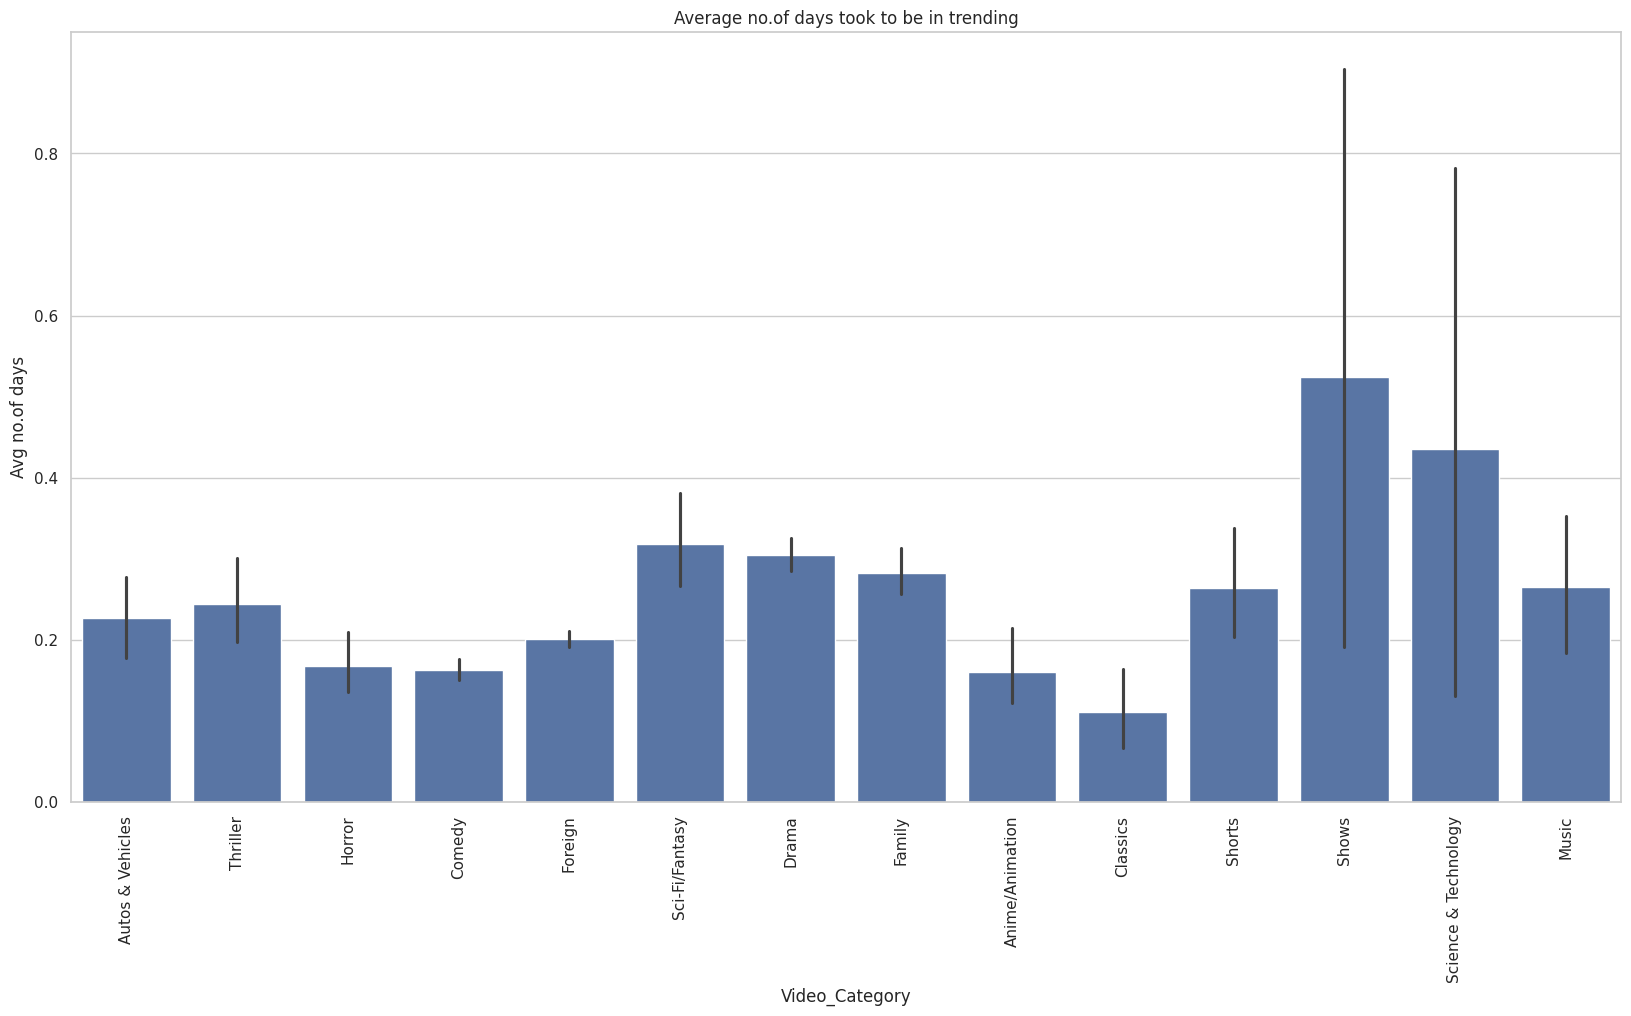

In [69]:
#Top 20 videos with most no.of times in trending(Channel wise)

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Average no.of days took to be in trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_minViews.Video_Category, y=df_minViews['DaysTakenToBeOnTrending'])
#sns.violinplot(x = df_minViews.Video_Category, y = df_minViews.DaysTakenToBeOnTrending )

# Add label for vertical axis
plt.ylabel("Avg no.of days")

In [63]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
90,n7C3aXBzM7s,நண்பா Mahesh Babu உனக்காக இது | Vijay VS Mahes...,2020-08-11 13:20:54+00:00,Little Talks,24,2020-08-12 00:00:00+00:00,little talks|kollywood news|tamil cinema news|...,441390,19862,483,1288,False,False,#Vijay #MaheshBabu #MasterGreen India challeng...,Foreign
91,lT6HV0Iweyo,कृष्ण जन्माष्टमी विशेष कीर्तन ! समाधान महाराज ...,2020-08-11 11:30:09+00:00,Marathi Tadka,24,2020-08-12 00:00:00+00:00,Marathi Tadka|मराठी तड़का|Marathi Tadka Videos|...,60749,477,80,18,False,False,किर्तनकार : समाधान महाराज शर्मा आपल्याला हि आप...,Foreign
115,ABrm1mQXj38,IPL 2020 - Patanjali IPL As Sponsor With 10 Bi...,2020-08-10 14:15:01+00:00,MY Cricket Production,17,2020-08-12 00:00:00+00:00,IPL|ipl 2020|ipl auction 2020|my cricket produ...,84754,11941,447,1862,False,False,Watch the 31st episode of IPL Ki Baat & Cricke...,Anime/Animation
116,nhO6cINEDs4,Gaadi Parking | Mirchi Murga | RJ Naved,2020-08-10 13:57:24+00:00,Mirchi Murga,23,2020-08-12 00:00:00+00:00,rj naved Mirchi murga latest|rj naved|Mirchi M...,395007,25223,429,946,False,False,RJ Naved and RJ Sayema together in a Murga! Ca...,Family
118,aUTu0cjX4Uw,FilterCopy | When Your Younger Sister Starts D...,2020-08-08 07:00:12+00:00,FilterCopy,23,2020-08-12 00:00:00+00:00,filtercopy|filtercopy ahsaas|ahsaas channa|ahs...,1836252,91361,2883,2810,False,False,You’re dating my sister? Hold on there bro ✋🏻T...,Family


#FURTHER ANALYSIS

Which category of videos have comments disabled?

In [71]:
comments_disabled_counts = df[df['comments_disabled'] == True]['Video_Category'].value_counts()
comments_disabled_counts

,count
Video_Category,
Foreign,157
Drama,91
Horror,70
Shorts,47
Family,24
Comedy,18
Sci-Fi/Fantasy,5
Autos & Vehicles,5
Anime/Animation,3


Which category of videos have ratings disabled ?

In [72]:
ratings_disabled = df[df['ratings_disabled'] == True]['Video_Category'].value_counts()
print("Categories with ratings disabled:\n", ratings_disabled)

Categories with ratings disabled:
 Video_Category
Drama               192
Horror              144
Foreign             105
Comedy               62
Family               31
Sci-Fi/Fantasy       13
Thriller              6
Autos & Vehicles      5
Music                 2
Anime/Animation       2
Shorts                1
Classics              1
Name: count, dtype: int64


Most watched video in India overall | Year wise | Category wise

In [73]:
# Convert 'publishedAt' to datetime
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')
df['year'] = df['publishedAt'].dt.year

In [74]:
# Overall
most_watched_overall = df.loc[df['view_count'].idxmax()]
print("Most watched video overall:\n", most_watched_overall[['title', 'channelTitle', 'view_count']])

Most watched video overall:
 title           BTS (방탄소년단) 'Butter' Official MV
channelTitle                         HYBE LABELS
view_count                             264407389
Name: 52057, dtype: object


In [75]:
# Year-wise
most_watched_by_year = df.loc[df.groupby('year')['view_count'].idxmax()]
print("\nMost watched videos by year:")
print(most_watched_by_year[['year', 'title', 'channelTitle', 'view_count']])


Most watched videos by year:
        year                               title    channelTitle  view_count
3619    2020  BTS (방탄소년단) 'Dynamite' Official MV  Big Hit Labels   253995993
52057   2021    BTS (방탄소년단) 'Butter' Official MV     HYBE LABELS   264407389
143385  2022        BLACKPINK - ‘Pink Venom’ M/V       BLACKPINK   187922090


In [76]:
# Category-wise
most_watched_by_category = df.loc[df.groupby('Video_Category')['view_count'].idxmax()]
print("\nMost watched videos by category:")
print(most_watched_by_category[['Video_Category', 'title', 'channelTitle', 'view_count']])


Most watched videos by category:
              Video_Category  \
106188       Anime/Animation   
115254      Autos & Vehicles   
141971              Classics   
52057                 Comedy   
57398                  Drama   
93154                 Family   
63215                Foreign   
115052                Horror   
86718                  Music   
104602        Sci-Fi/Fantasy   
134419  Science & Technology   
13357                 Shorts   
65239                  Shows   
113075              Thriller   

                                                    title  \
106188  Dr. Dre, Snoop Dogg, Eminem, Mary J. Blige & K...   
115254  KGF Chapter 2 Trailer|Hindi|Yash|Sanjay Dutt|R...   
141971  “Bhai ka farz har kadam pe🙏” #littleglove #ash...   
52057                    BTS (방탄소년단) 'Butter' Official MV   
57398             Paytm IPL 2021 Ad - The Salon (English)   
93154    OMG Hot burger! 😂 #shorts Best video by MoniLina   
63215                 Turn into orbeez - Tutorial #Shorts 

 Year-wise number of videos published which were trending


Year-wise count of unique trending videos:
year
2020     7653
2021    20310
2022    17963
Name: video_id, dtype: int64


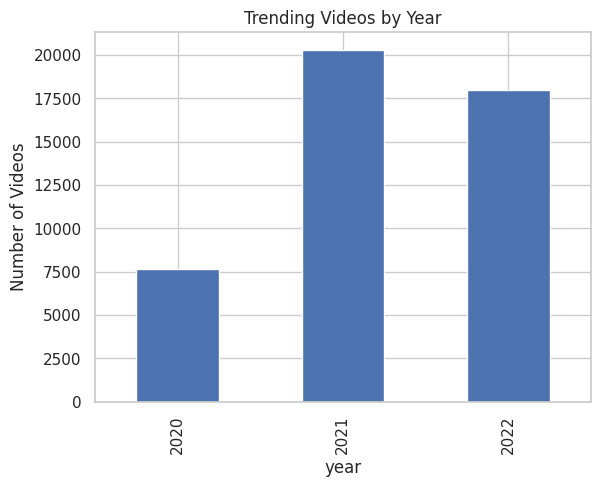

In [77]:
videos_per_year = df.groupby('year')['video_id'].nunique()
print("\nYear-wise count of unique trending videos:")
print(videos_per_year)
videos_per_year.plot(kind='bar', title='Trending Videos by Year')
plt.ylabel('Number of Videos')
plt.show()

Distribution of numerical columns

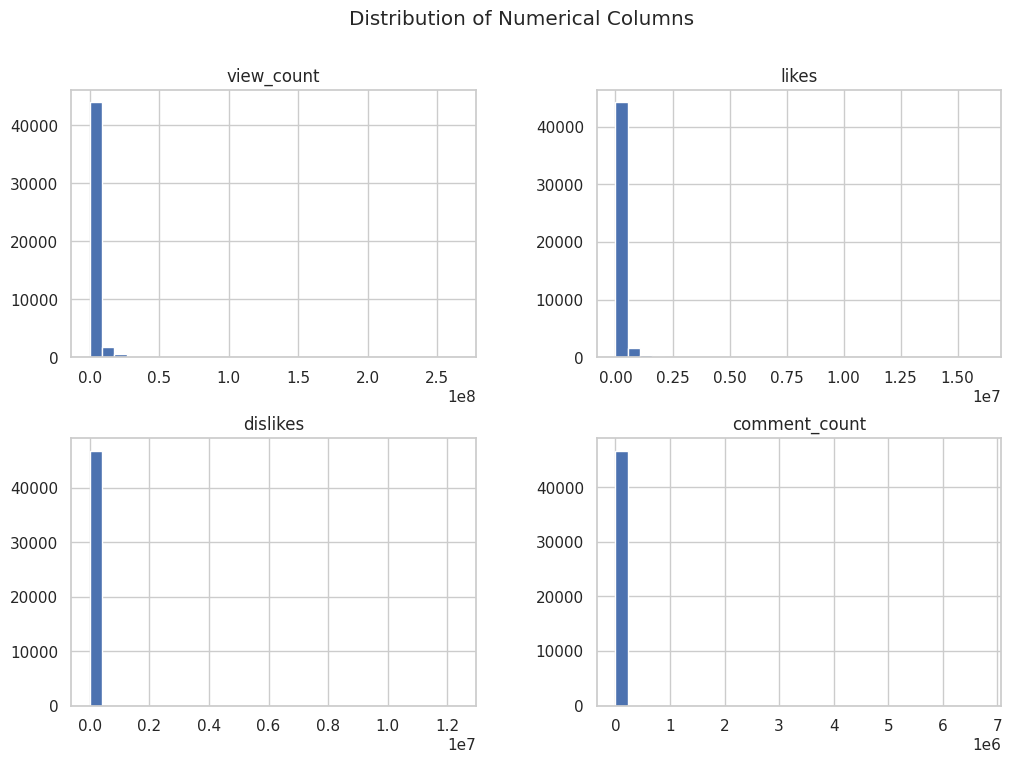

In [78]:
numerical_cols = ['view_count', 'likes', 'dislikes', 'comment_count']
df[numerical_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Columns')
plt.show()

Correlations between numerical variables

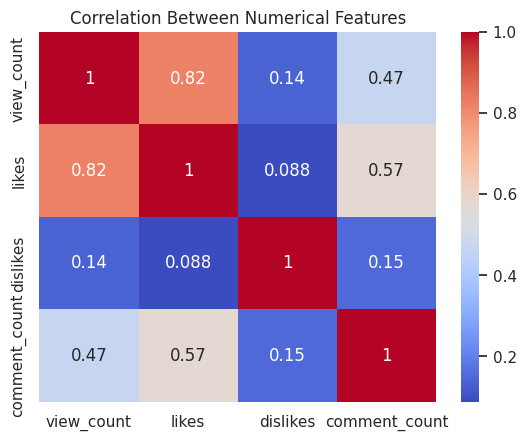

In [79]:
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

Plot lmplot and regplot for numerical vs. categorical variable combinations

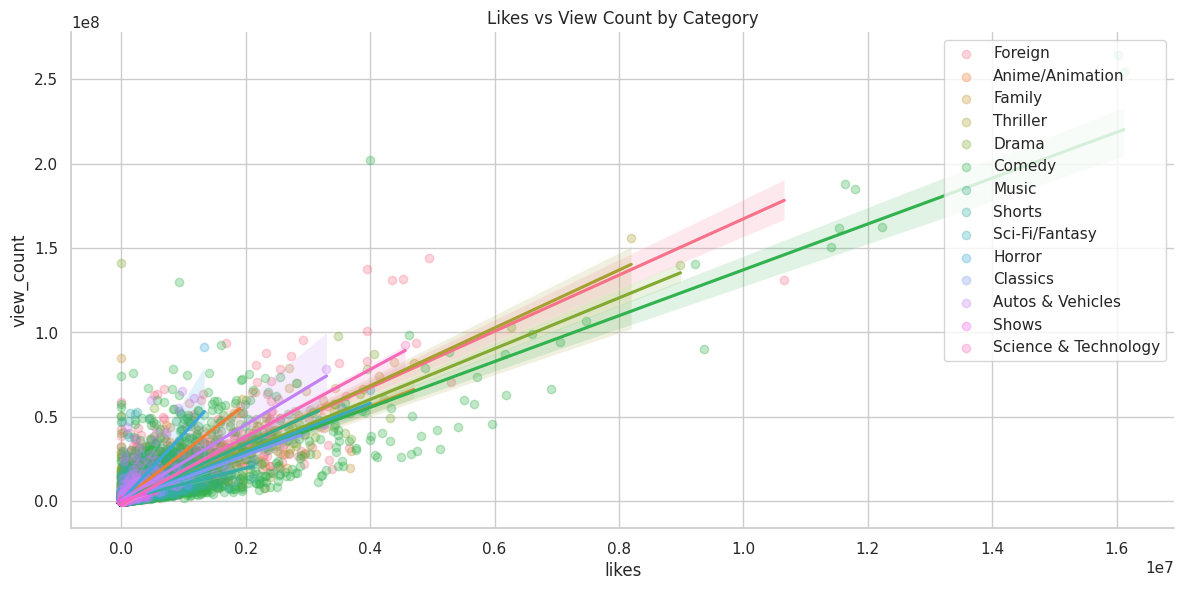

In [80]:
sns.lmplot(data=df, x='likes', y='view_count', hue='Video_Category',
           scatter_kws={'alpha':0.3}, legend=False, height=6, aspect=2)
plt.title('Likes vs View Count by Category')
plt.legend(loc='upper right')
plt.show()

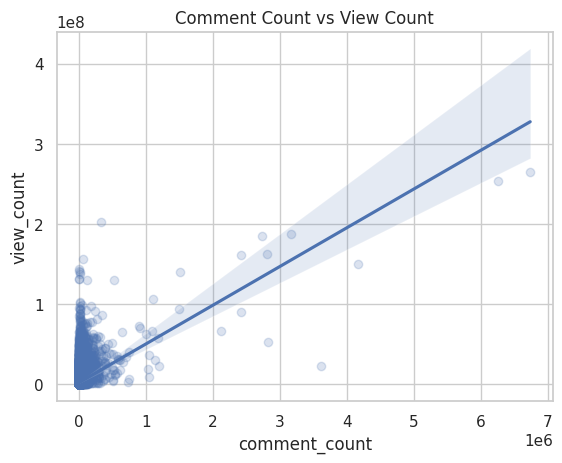

In [81]:
sns.regplot(data=df, x='comment_count', y='view_count', scatter_kws={'alpha':0.2})
plt.title('Comment Count vs View Count')
plt.show()